# Exploratory Data Analysis

#### Q4. (To explore Business Analytics)
#### Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’ 
#### You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data? You can choose any of the tool of your choice (Python/R/Tableau/PowerBI/Excel)
#### Dataset : https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view?usp=sharing


In [1]:
import csv
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.available
plt.style.use('seaborn-notebook')

## Importing file

In [2]:
df_Super=pd.read_csv('SampleSuperstore.csv')
df_Super[:3]

Ship Mode    Segment        Country         City       State  \
0  Second Class   Consumer  United States    Henderson    Kentucky   
1  Second Class   Consumer  United States    Henderson    Kentucky   
2  Second Class  Corporate  United States  Los Angeles  California   

   Postal Code Region         Category Sub-Category   Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.96         2   
1        42420  South        Furniture       Chairs  731.94         3   
2        90036   West  Office Supplies       Labels   14.62         2   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  
2       0.0    6.8714

## Checking Data

In [3]:
df_Super.shape

(9994, 13)

## Removing unwanted data values

In [4]:
df_Super.dropna(inplace=True)

In [5]:
df_Super.drop_duplicates(subset=None, keep='first', inplace=True)

In [6]:
df_Super.duplicated().sum()

0

In [7]:
df_Super.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df_Super.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [9]:
df_Super.describe()

Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600

### Since the Whole data is of United States and we already know that, we wont need the country column and so we can see the data Region-wise to make assumptions

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


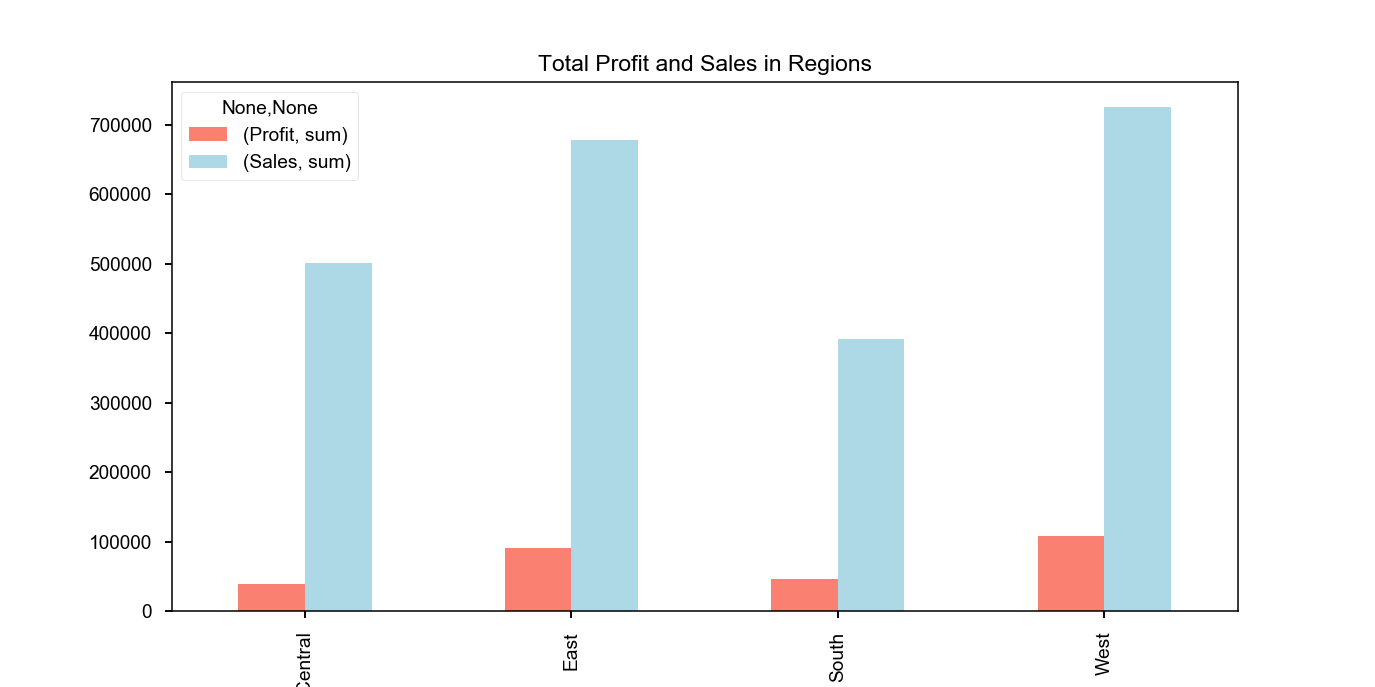

In [10]:
#fig, ax1 = plt.subplots()
#ax2 = plt.twinx(ax = ax1)
df_Super.groupby('Region')['Profit','Sales'].agg(['sum']).plot(kind='bar', figsize=(10,5),color=['salmon','lightblue'])
#df_Super.groupby('Region')['Profit','Sales'].agg(['sum']).plot( xlim=ax.get_xlim(), ax =ax1, color=['red','salmon'],  figsize=(20,5))
plt.title('Total Profit and Sales in Regions')
#ax2.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.grid(b=False)
#ax2.grid(b=False)

plt.show()

#### Profit for each Region gets higher as the Sale gets higher, But they don have a linear relationship
### West has highest Sale and profit followed by East , Central and South. Yet Central has a better sale than South but Central has less profit than South
### Analyzing each Region Separately to understand the Trend

## Central Region

In [12]:
central=df_Super.where(df_Super['Region']=='Central')
central.dropna(inplace=True)
central.drop(['Region'],inplace=True,axis=1)
central[:3]

Ship Mode      Segment        Country        City      State  \
14  Standard Class  Home Office  United States  Fort Worth      Texas   
15  Standard Class  Home Office  United States  Fort Worth      Texas   
16  Standard Class     Consumer  United States     Madison  Wisconsin   

    Postal Code         Category Sub-Category    Sales  Quantity  Discount  \
14      76106.0  Office Supplies   Appliances   68.810       5.0       0.8   
15      76106.0  Office Supplies      Binders    2.544       3.0       0.8   
16      53711.0  Office Supplies      Storage  665.880       6.0       0.0   

      Profit  
14 -123.8580  
15   -3.8160  
16   13.3176

In [14]:
central.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   2319.000000   2319.000000  2319.000000  2319.000000  2319.000000
mean   65339.882708    215.947759     3.780940     0.240250    17.100421
std    11426.698377    633.275800     2.162182     0.265358   291.738112
min    46060.000000      0.444000     1.000000     0.000000 -3701.892800
25%    55125.000000     14.620000     2.000000     0.000000    -5.664300
50%    65203.000000     45.980000     3.000000     0.200000     5.179200
75%    77041.000000    200.012000     5.000000     0.300000    22.456200
max    79907.000000  17499.950000    14.000000     0.800000  8399.976000

### Visualising the data

<IPython.core.display.Javascript object>


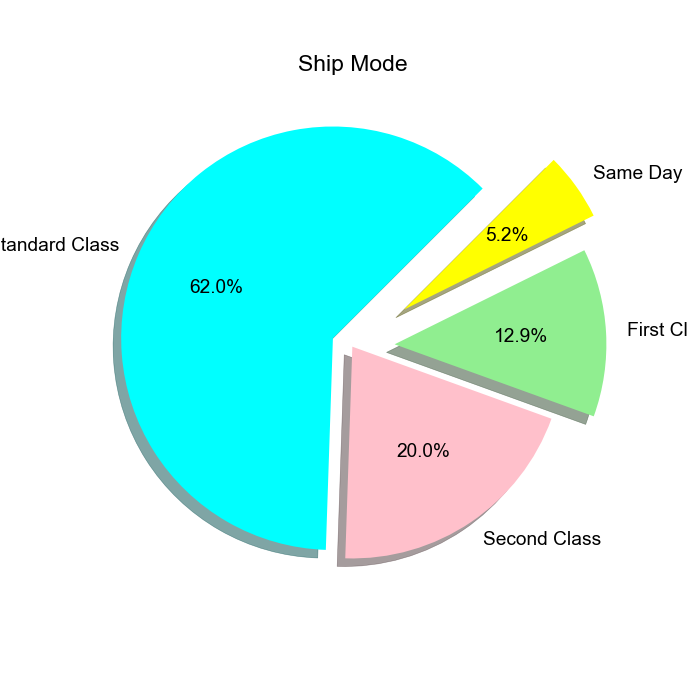

In [17]:
fig, ax = plt.subplots(figsize =(5, 5)) 
explode = (0.1, 0.0, 0.2, 0.3) 
colors=['cyan','pink','lightgreen','yellow']
plt.pie(central['Ship Mode'].value_counts(),colors=colors,
        labels= central['Ship Mode'].value_counts().index, startangle=45,
        autopct='%1.1f%%',shadow=True, explode=explode)
plt.title("Ship Mode");

<IPython.core.display.Javascript object>


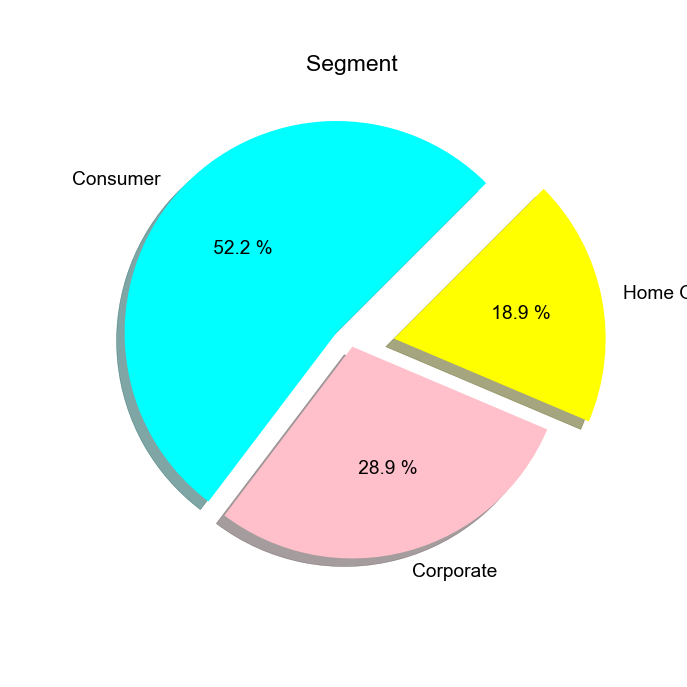

In [20]:
fig, ax = plt.subplots(figsize =(5, 5))
explode = (0.1, 0.0, 0.2)
colors=['cyan','pink','yellow']
plt.title("Segment")
plt.pie(central['Segment'].value_counts(), autopct ='% 1.1f %%',colors=colors,
        labels= central['Segment'].value_counts().index,
        startangle=45,shadow=True, explode=explode);


<IPython.core.display.Javascript object>


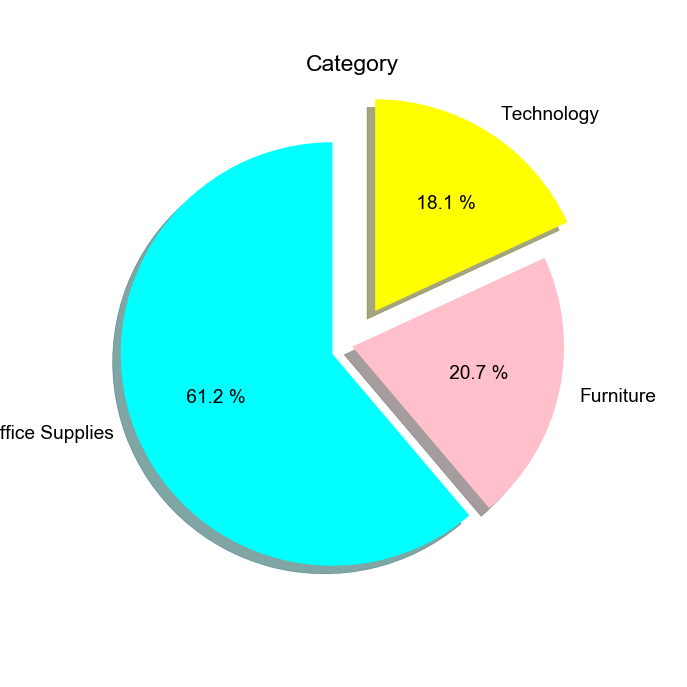

In [22]:
fig, ax = plt.subplots(figsize =(5, 5))
plt.title("Category")
explode = (0.1, 0.0, 0.2)
colors=['cyan','pink','yellow']
plt.pie(central['Category'].value_counts(),labels= central['Category'].value_counts().index, 
        startangle=90, colors= colors, explode=explode, autopct ='% 1.1f %%',shadow=True);

In [23]:
central['Sub-Category'].unique()

array(['Appliances', 'Binders', 'Storage', 'Art', 'Paper', 'Phones',
       'Furnishings', 'Envelopes', 'Bookcases', 'Chairs', 'Accessories',
       'Labels', 'Tables', 'Machines', 'Fasteners', 'Supplies', 'Copiers'],
      dtype=object)

<IPython.core.display.Javascript object>


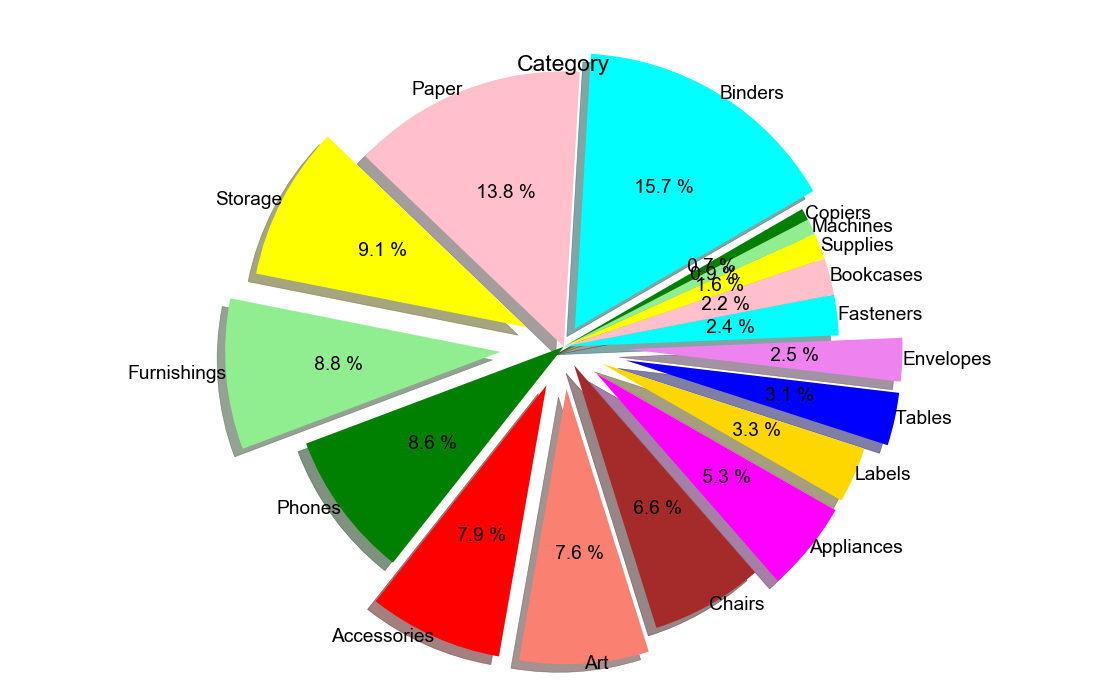

In [34]:
fig, ax = plt.subplots(figsize =(8, 5))
plt.title("Category")
explode = (0.1, 0.0, 0.2,0.3,0,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0,0,0,0,0)
colors=['cyan','pink','yellow','lightgreen', 'green', 'red','salmon','brown','magenta','gold','blue','violet']
plt.pie(central['Sub-Category'].value_counts(),
        labels= central['Sub-Category'].value_counts().index, 
        startangle=30, colors= colors,
        explode=explode, autopct ='% 1.1f %%',
       radius=1.3, labeldistance=1, shadow=True);

<IPython.core.display.Javascript object>


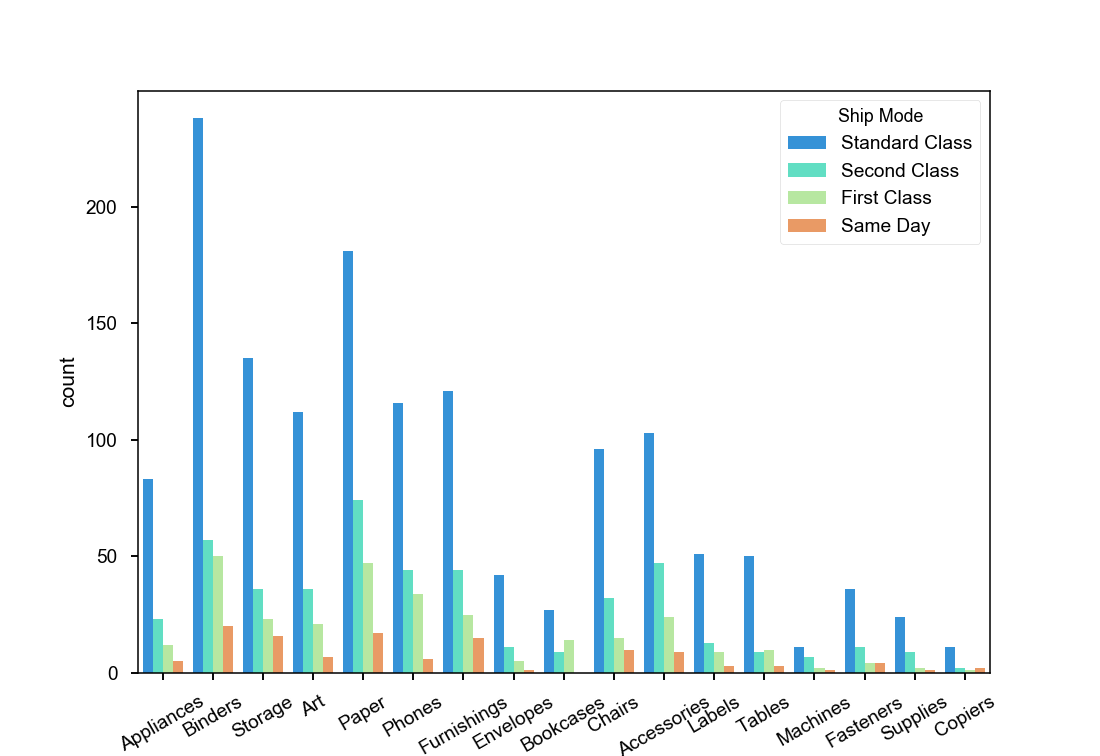

In [36]:
plt.figure()
sns.countplot(x=central['Sub-Category'],hue=central['Ship Mode'],palette='rainbow')
plt.xticks(rotation=30);

## Comparing Profit data According to each category

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


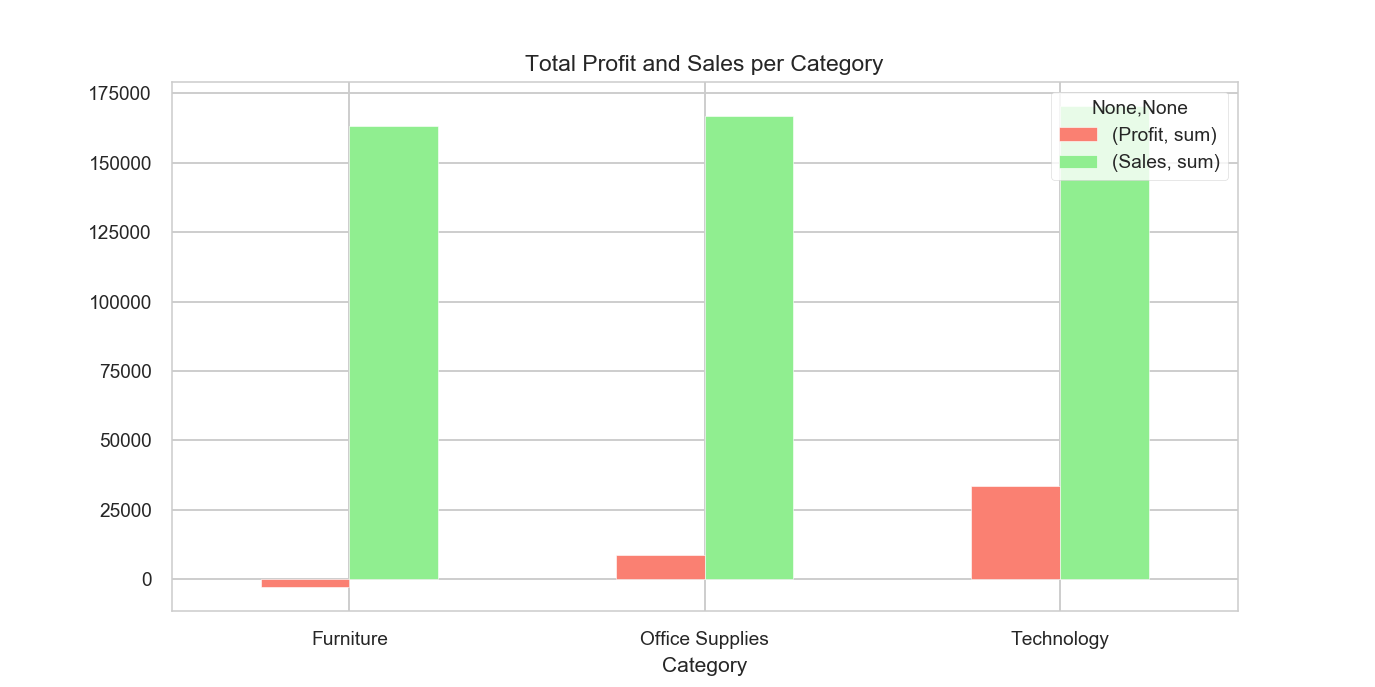

In [117]:
central.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,5),color=['salmon','lightgreen'])
plt.title('Total Profit and Sales per Category')
plt.xticks(rotation=0)
plt.show()

#### Inspite of high sale Furniture seems to cause ultimate loss for central Region and technology seems to earn the highest profit 

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


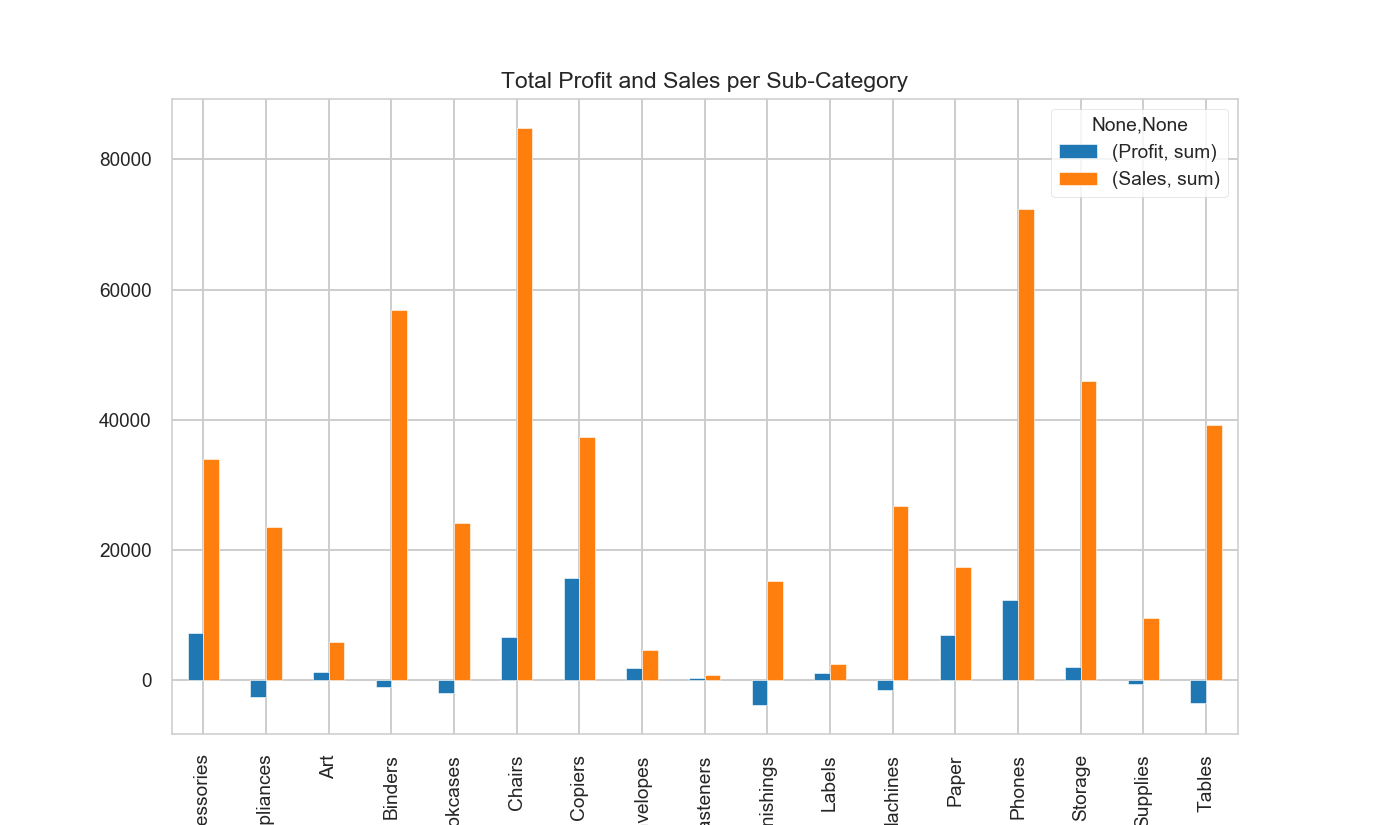

In [121]:
central.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


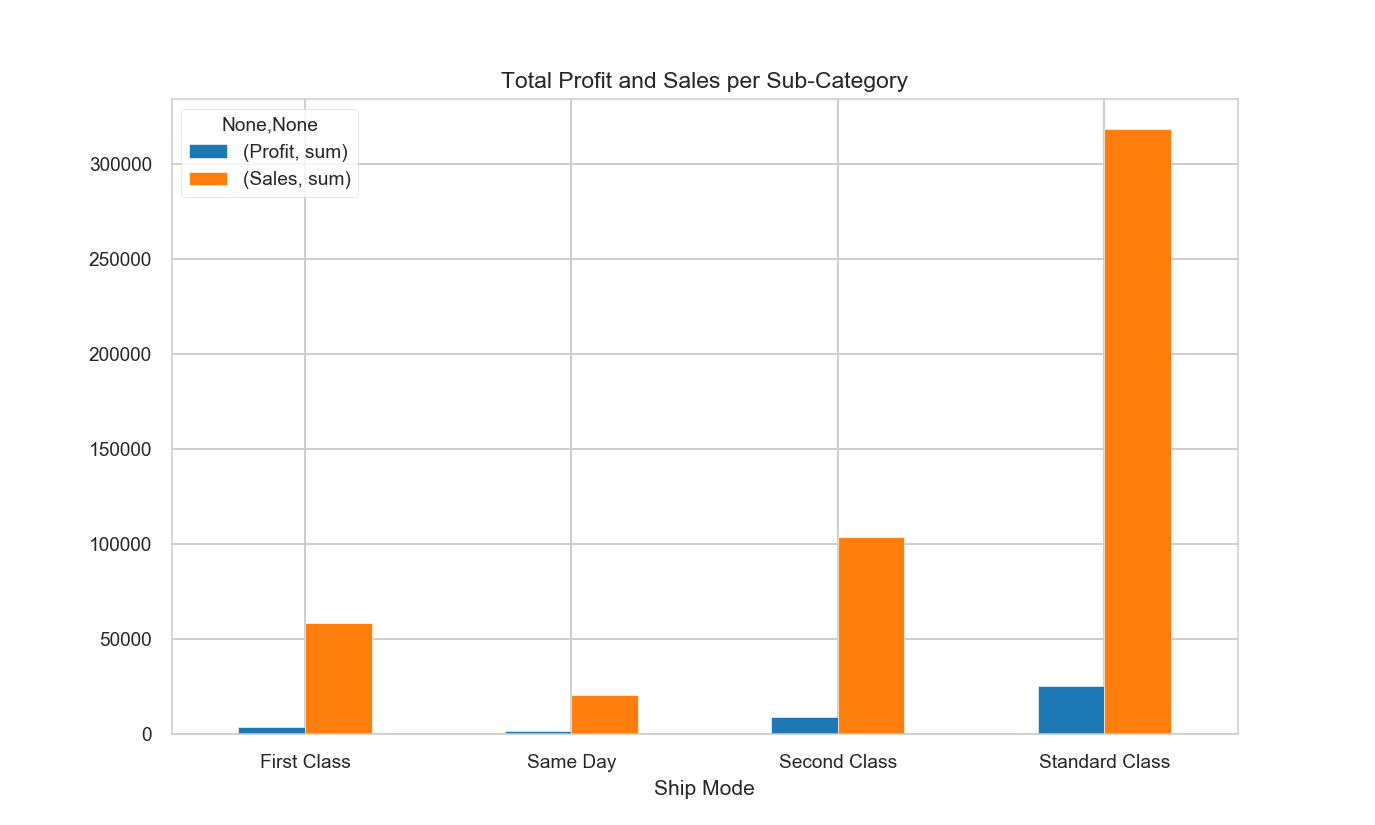

In [136]:
central.groupby('Ship Mode')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.xticks(rotation=0)
plt.show()

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


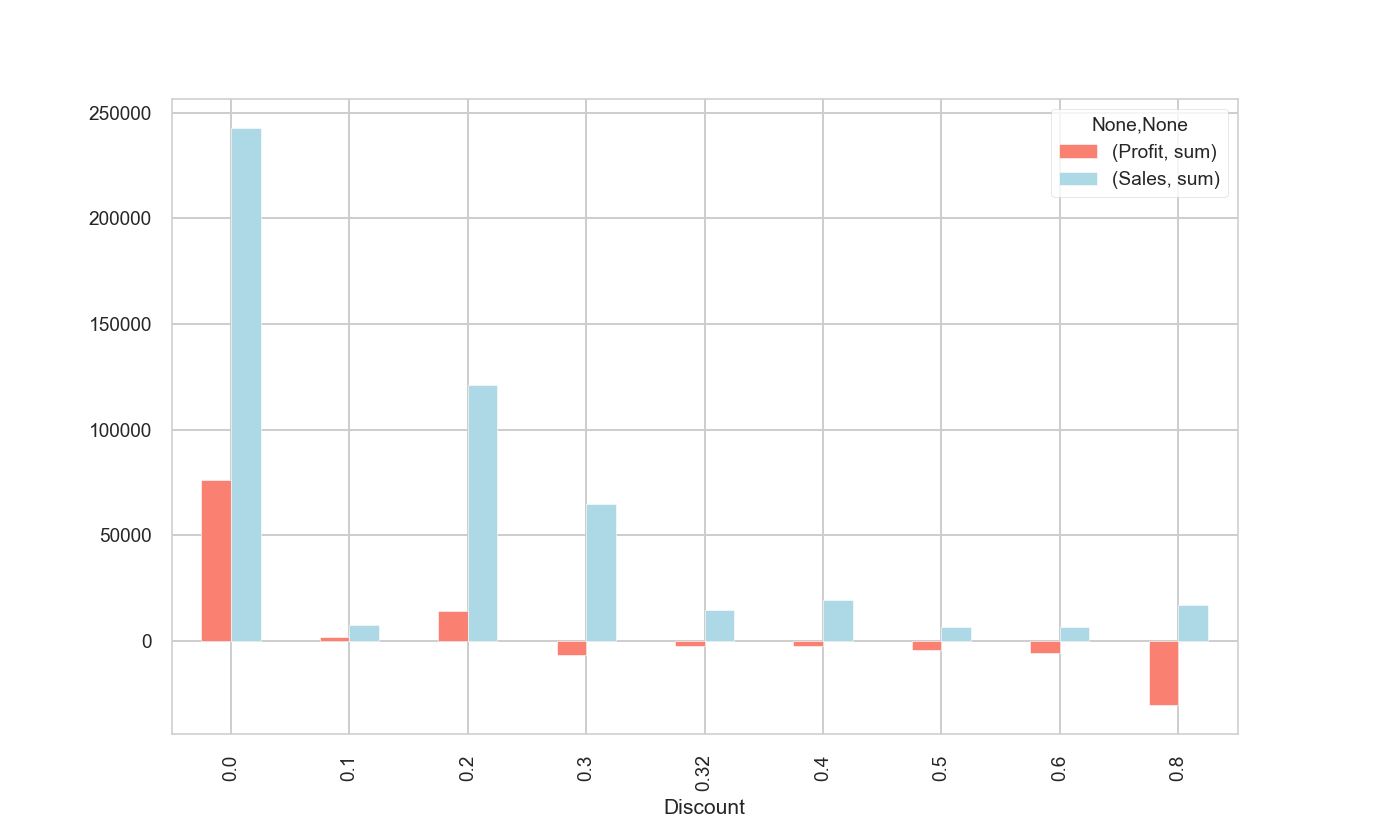

In [150]:
central.groupby('Discount')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6),color=['salmon','lightblue'])
plt.show()

### Plotting the discounts with sales and profit shows that as the discount percent increases the profit decreases, 80% discount gives the highest loss.
### Sales of products with less discount is much higher than sales of products with discounts. It means either products in sale don't meet the expectations of the customer

<IPython.core.display.Javascript object>


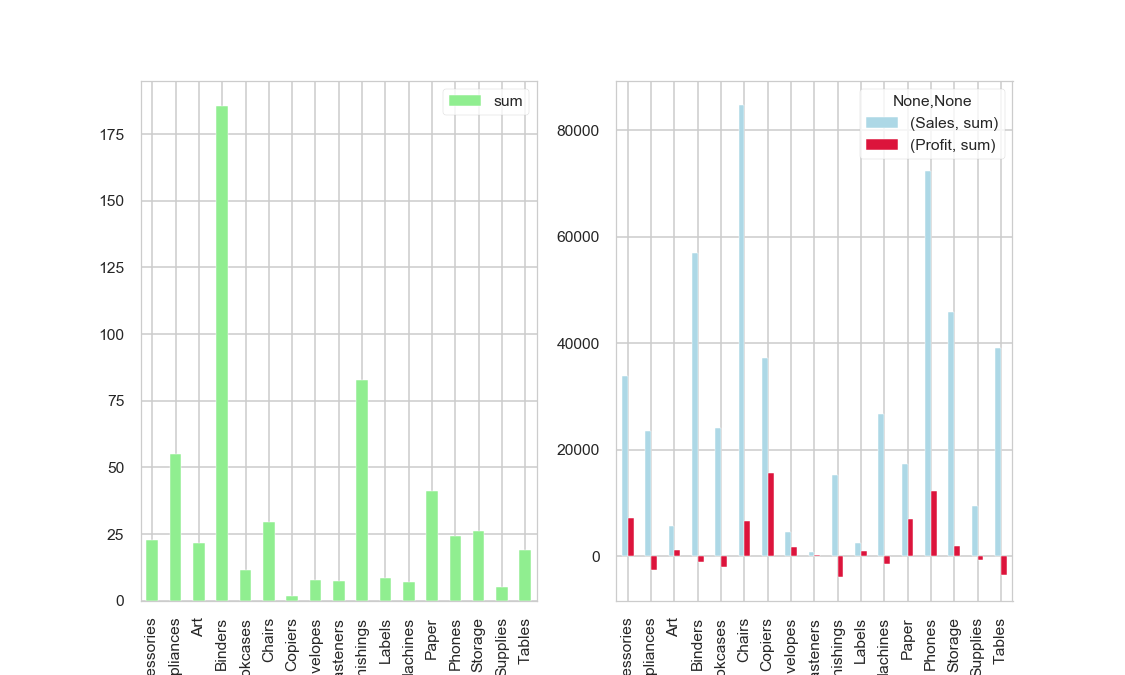

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [168]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

central.groupby('Sub-Category')['Discount'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightgreen'],ax=axes[0])
central.groupby('Sub-Category')['Sales','Profit'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightblue','crimson'],ax=axes[1])

### Furnishings has a huge discount and high sale but it leads to loss, similarly Appliances have discount more than 50% yet results in loss and finally Binders having the highest discounted products with relatively high sale still causes loss

In [103]:
central['City'].nunique()

181

In [106]:
central['City'].unique()


array(['Fort Worth', 'Madison', 'Fremont', 'Houston', 'Richardson',
       'Naperville', 'Eagan', 'Westland', 'New Albany', 'Chicago',
       'Jackson', 'Rochester', 'Minneapolis', 'Saint Paul', 'Orland Park',
       'Urbandale', 'Bloomington', 'Independence', 'Franklin', 'Edmond',
       'San Antonio', 'Decatur', 'Grand Prairie', 'Dallas', 'Saginaw',
       'Detroit', 'Lakeville', 'Pasadena', 'Taylor', 'Austin',
       'Harlingen', 'Quincy', 'Peoria', 'Canton', 'Columbus', 'Norman',
       'Park Ridge', 'Amarillo', 'Huntsville', 'Gladstone', 'Green Bay',
       'Laredo', 'Dearborn', 'Rochester Hills', 'Aurora', 'Arlington',
       'Tyler', 'Evanston', 'Trenton', 'Cottage Grove', 'Des Moines',
       'Omaha', 'Milwaukee', 'Garland', 'Round Rock', 'Burlington',
       'Jefferson City', 'Saint Peters', 'Rockford', 'Brownsville',
       'Richmond', 'La Porte', 'Lansing', 'Royal Oak', 'Cedar Rapids',
       'Irving', 'Coppell', 'Appleton', 'Allen', 'El Paso', 'Grapevine',
       'Carrollto

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


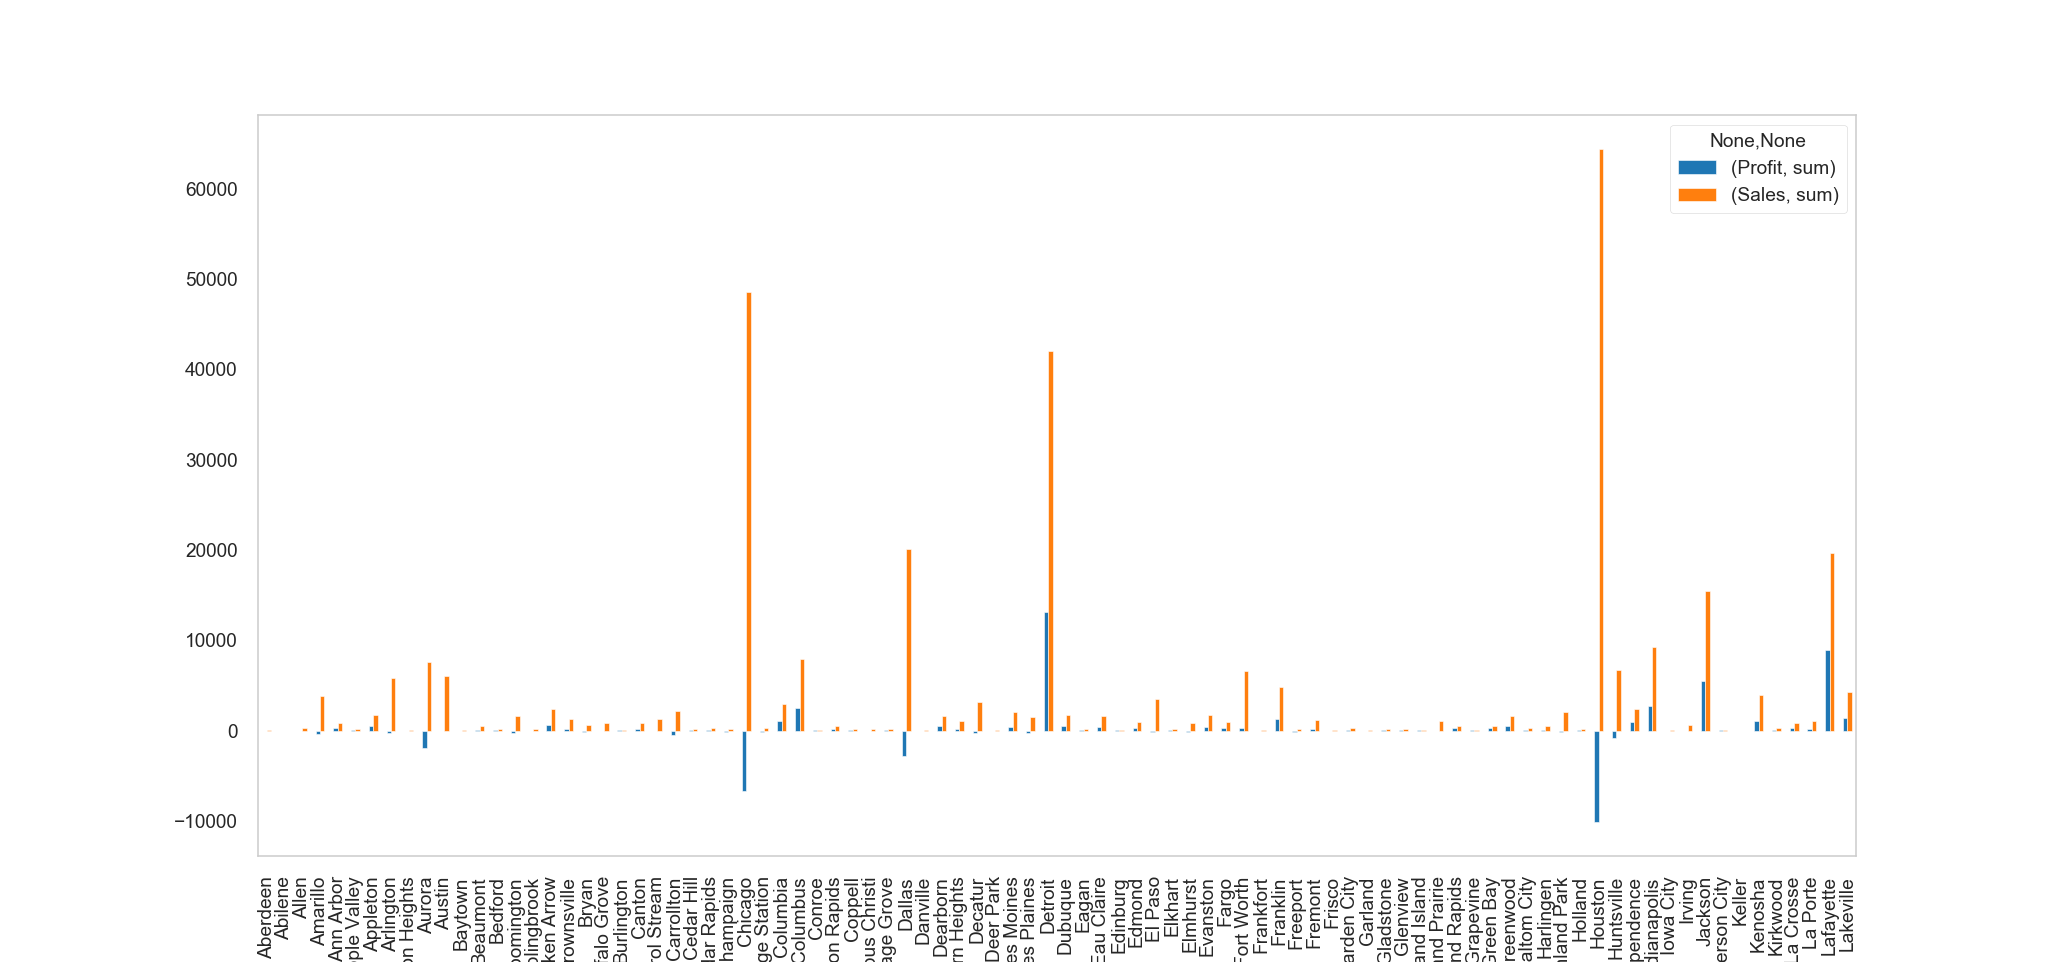

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<IPython.core.display.Javascript object>


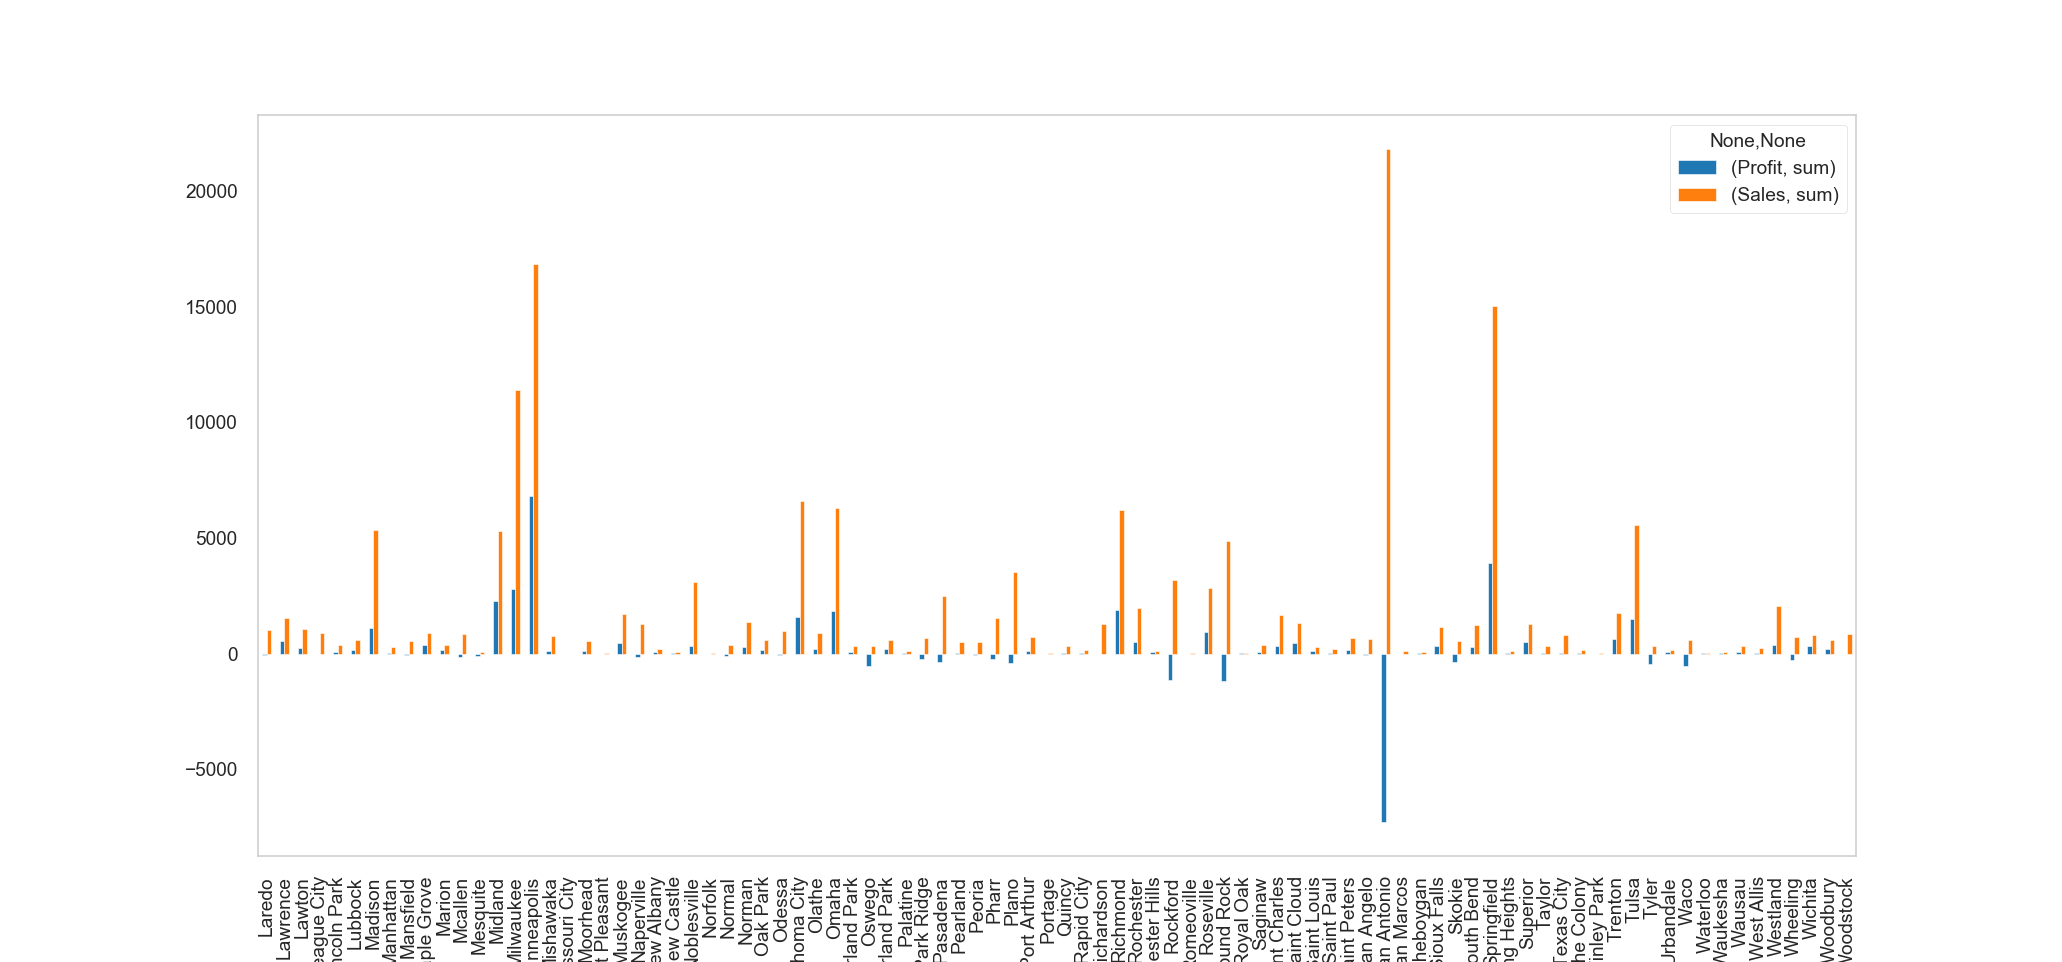

In [102]:
central.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).head(90).plot.bar(figsize=(15,7)).grid(b=False)
central.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).tail(90).plot.bar(figsize=(15,7)).grid(b=False)
#plt.grid(b=False)

### Inspite high sale cities like houston,  San Antonio and Chicago produces big loss for the company
### Whereas Cities like RockFord, Round Rock,Tyler,Waco,Wheeling,Park Ridge, Pasa Dena,Plano,Port Arthur,Oswego,Austin and Dallas produces small loss with less sale in the area

# East Region

In [170]:
east=df_Super.where(df_Super['Region']=='East')
east.dropna(inplace=True)
east[:3]

Ship Mode   Segment        Country          City         State  \
23    Second Class  Consumer  United States  Philadelphia  Pennsylvania   
27  Standard Class  Consumer  United States  Philadelphia  Pennsylvania   
28  Standard Class  Consumer  United States  Philadelphia  Pennsylvania   

    Postal Code Region         Category Sub-Category     Sales  Quantity  \
23      19140.0   East        Furniture       Chairs    71.372       2.0   
27      19140.0   East        Furniture    Bookcases  3083.430       7.0   
28      19140.0   East  Office Supplies      Binders     9.618       2.0   

    Discount     Profit  
23       0.3    -1.0196  
27       0.5 -1665.0522  
28       0.7    -7.0532

In [171]:
central.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   2319.000000   2319.000000  2319.000000  2319.000000  2319.000000
mean   65339.882708    215.947759     3.780940     0.240250    17.100421
std    11426.698377    633.275800     2.162182     0.265358   291.738112
min    46060.000000      0.444000     1.000000     0.000000 -3701.892800
25%    55125.000000     14.620000     2.000000     0.000000    -5.664300
50%    65203.000000     45.980000     3.000000     0.200000     5.179200
75%    77041.000000    200.012000     5.000000     0.300000    22.456200
max    79907.000000  17499.950000    14.000000     0.800000  8399.976000

<IPython.core.display.Javascript object>


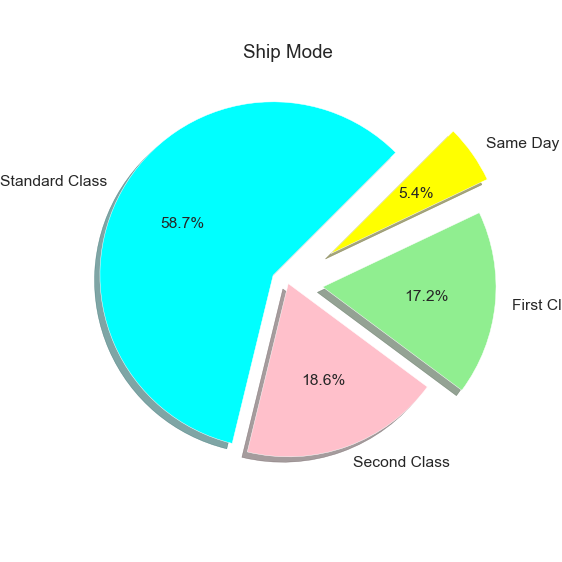

In [172]:
fig, ax = plt.subplots(figsize =(5, 5)) 
explode = (0.1, 0.0, 0.2, 0.3) 
colors=['cyan','pink','lightgreen','yellow']
plt.pie(east['Ship Mode'].value_counts(),colors=colors,
        labels= central['Ship Mode'].value_counts().index, startangle=45,
        autopct='%1.1f%%',shadow=True, explode=explode)
plt.title("Ship Mode");

<IPython.core.display.Javascript object>


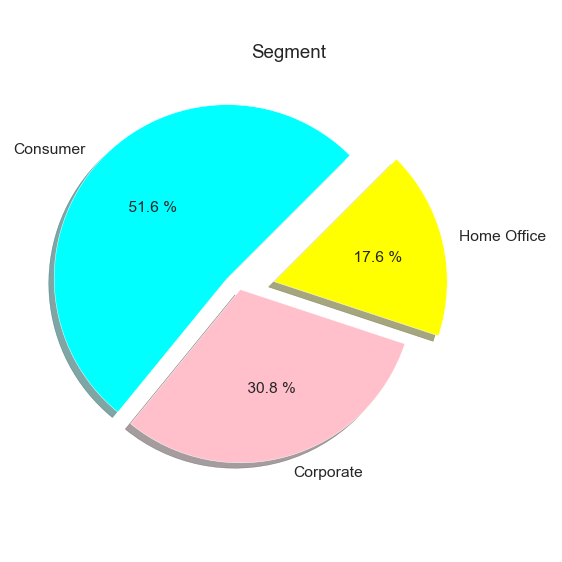

In [173]:
fig, ax = plt.subplots(figsize =(5, 5))
explode = (0.1, 0.0, 0.2)
colors=['cyan','pink','yellow']
plt.title("Segment")
plt.pie(east['Segment'].value_counts(), autopct ='% 1.1f %%',colors=colors,
        labels= central['Segment'].value_counts().index,
        startangle=45,shadow=True, explode=explode);

<IPython.core.display.Javascript object>


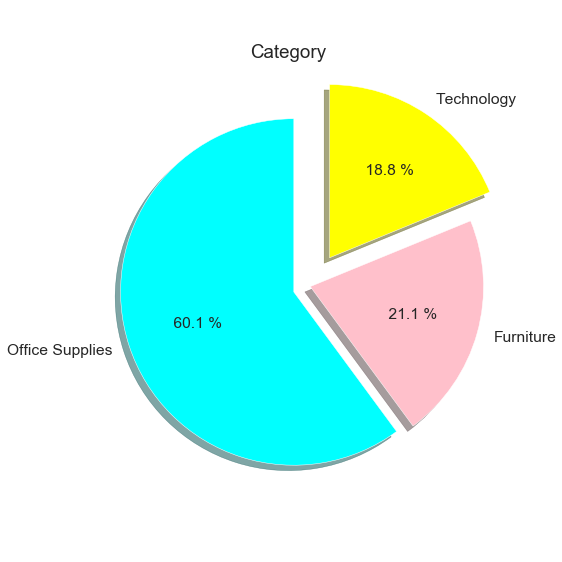

In [174]:
fig, ax = plt.subplots(figsize =(5, 5))
plt.title("Category")
explode = (0.1, 0.0, 0.2)
colors=['cyan','pink','yellow']
plt.pie(east['Category'].value_counts(),labels= central['Category'].value_counts().index, 
        startangle=90, colors= colors, explode=explode, autopct ='% 1.1f %%',shadow=True);

<IPython.core.display.Javascript object>


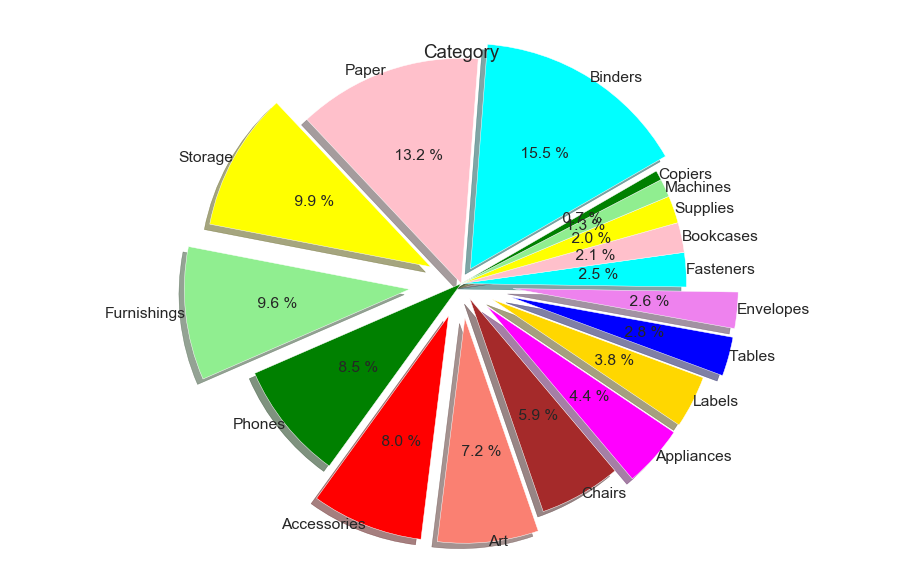

In [175]:
fig, ax = plt.subplots(figsize =(8, 5))
plt.title("Category")
explode = (0.1, 0.0, 0.2,0.3,0,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0,0,0,0,0)
colors=['cyan','pink','yellow','lightgreen', 'green', 'red','salmon','brown','magenta','gold','blue','violet']
plt.pie(east['Sub-Category'].value_counts(),
        labels= central['Sub-Category'].value_counts().index, 
        startangle=30, colors= colors,
        explode=explode, autopct ='% 1.1f %%',
       radius=1.3, labeldistance=1, shadow=True);

<IPython.core.display.Javascript object>


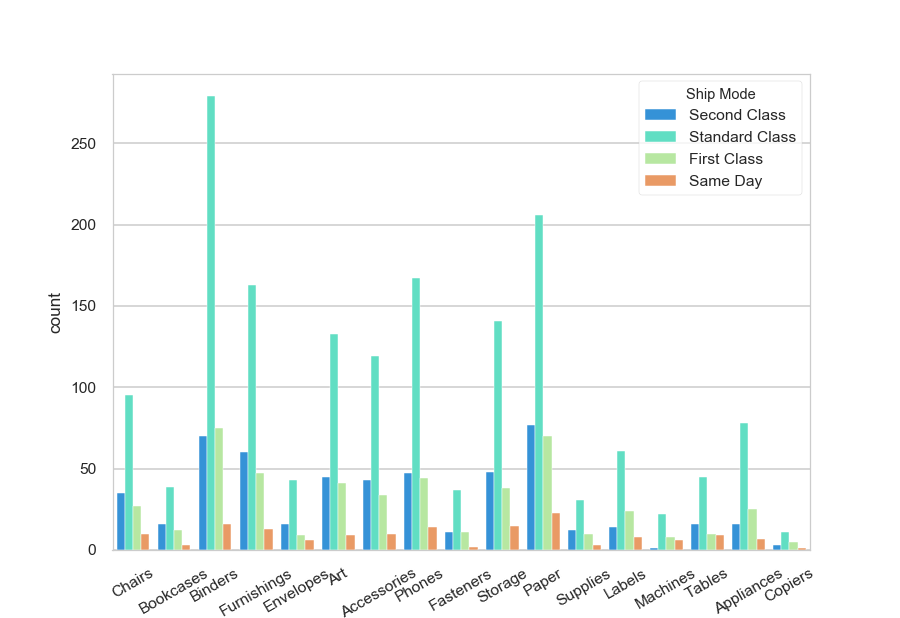

In [176]:
plt.figure()
sns.countplot(x=east['Sub-Category'],hue=east['Ship Mode'],palette='rainbow')
plt.xticks(rotation=30);

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


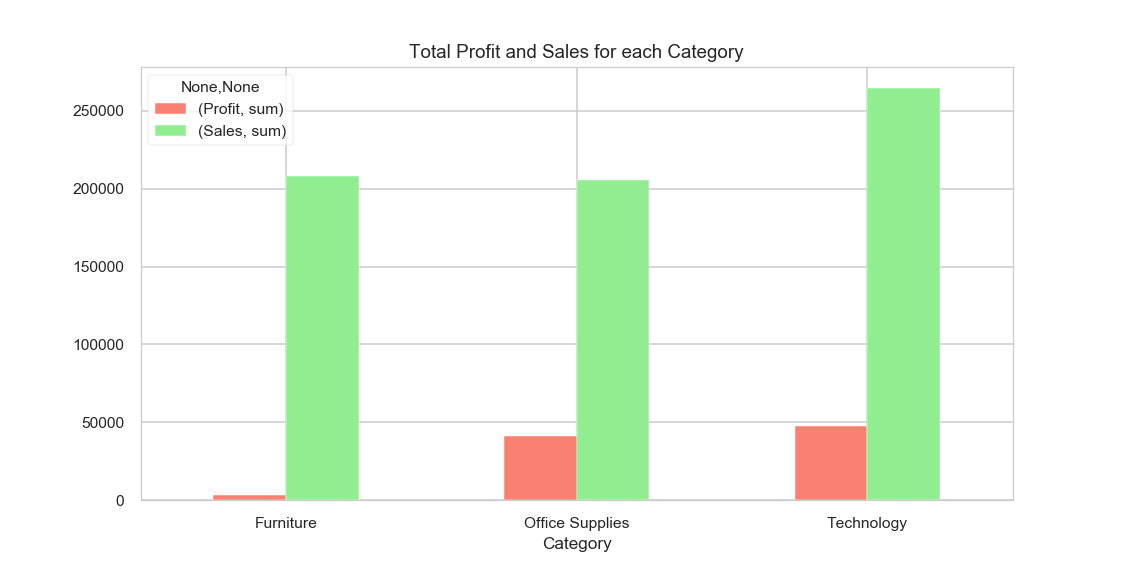

In [178]:
east.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,5),color=['salmon','lightgreen'])
plt.title('Total Profit and Sales for each Category')
plt.xticks(rotation=0)
plt.show()

### Profit increases as the Sale increases, the most demanded Category is Technology with highest profit

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


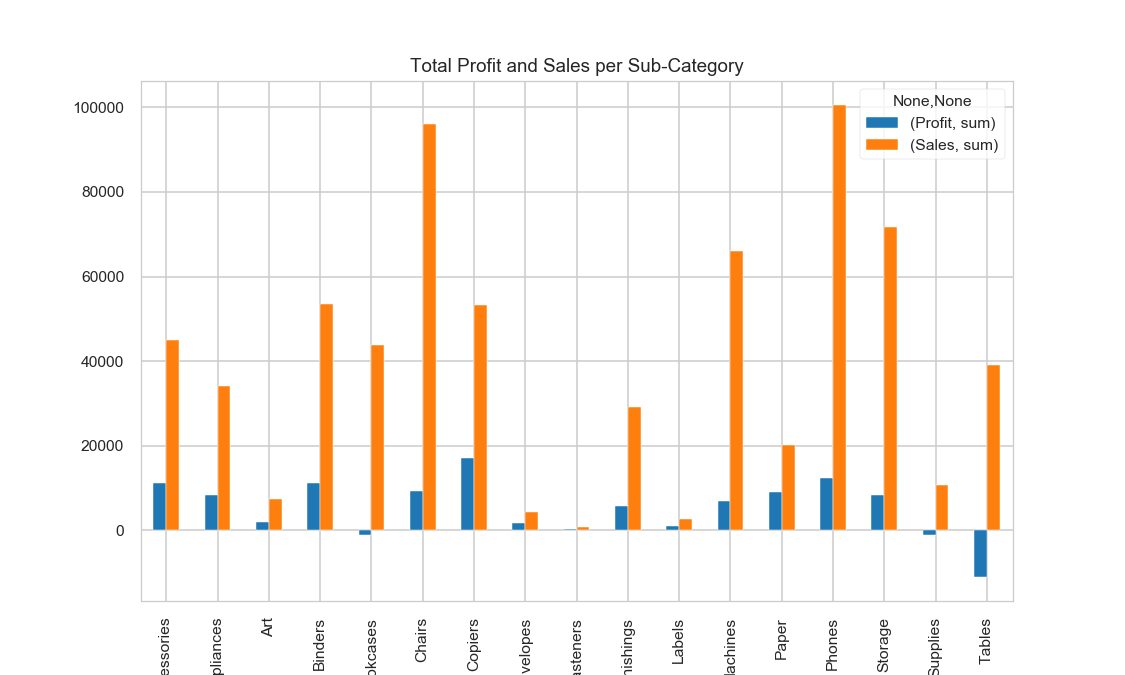

In [179]:
east.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

### Mostly all the products results in profit except Tables which produces loss along with bookcases

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<IPython.core.display.Javascript object>


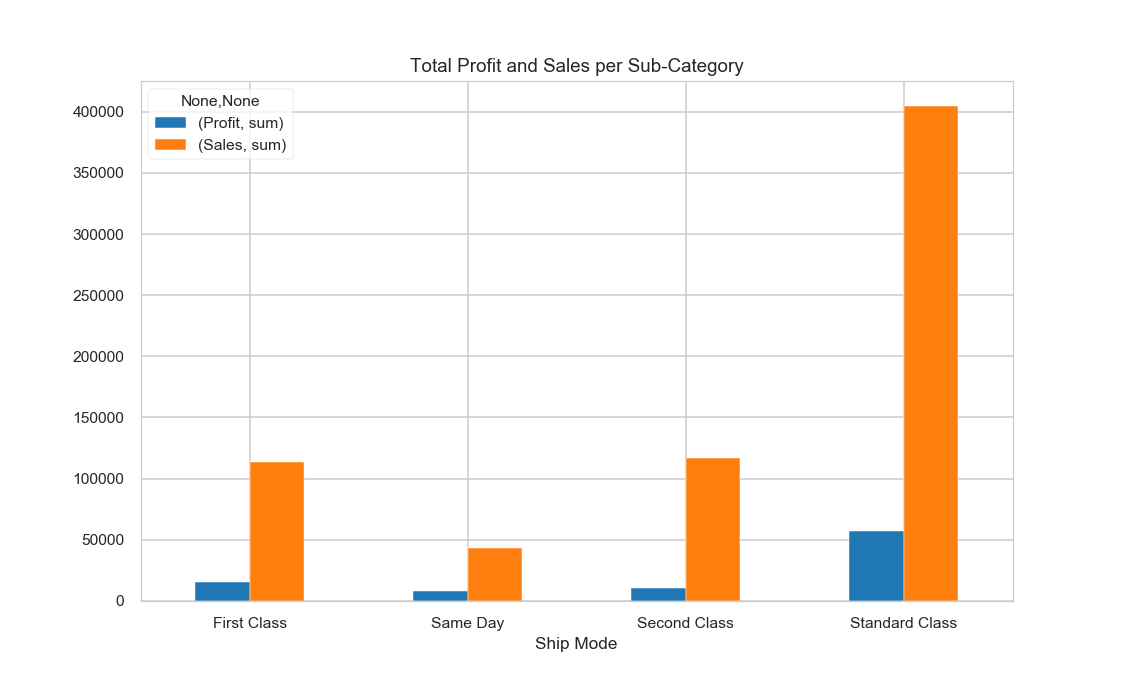

In [180]:
east.groupby('Ship Mode')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.xticks(rotation=0)
plt.show()

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


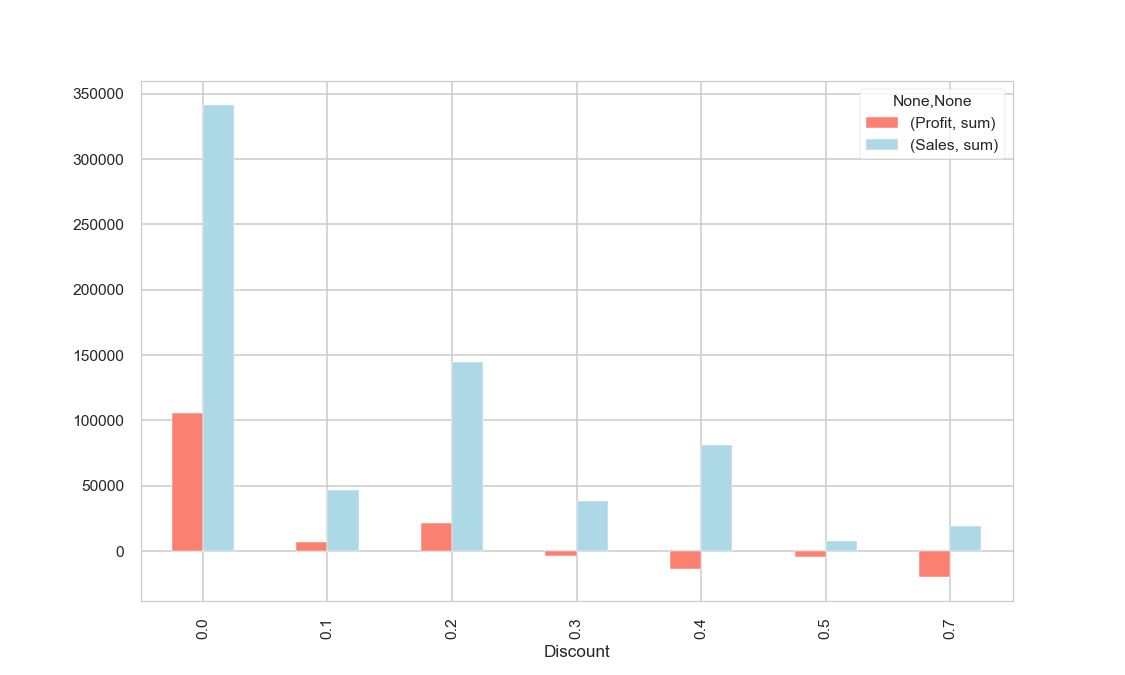

In [181]:
east.groupby('Discount')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6),color=['salmon','lightblue'])
plt.show()

### The Profit decreases with the increase in the discount and increase in discount does not affect much of the sale

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


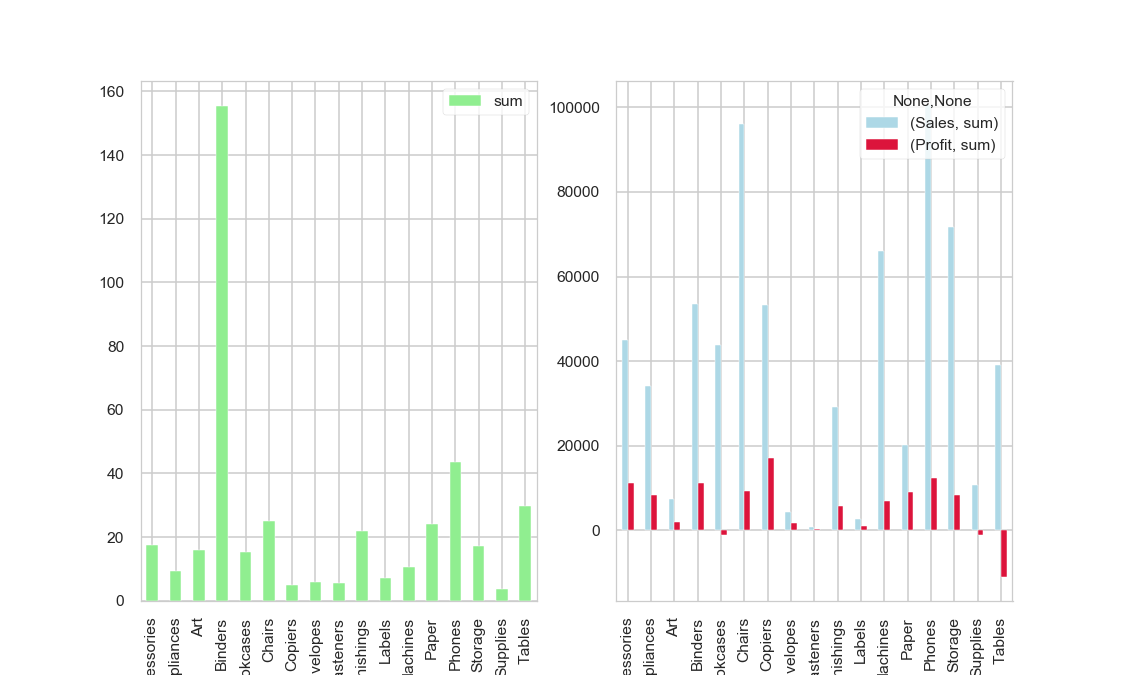

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [182]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

east.groupby('Sub-Category')['Discount'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightgreen'],ax=axes[0])
east.groupby('Sub-Category')['Sales','Profit'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightblue','crimson'],ax=axes[1])

### Discount on tables category helps in sale but does not produce any profit ,it further leads to loss
### chairs and phones are in high demand irrespective of discount percent and here discount on binders really helps in sale and profit unlike what we saw in the central region
### Finally Copiers seems to win the highest profit despite of sale or discount

In [184]:
east['City'].nunique()

108

In [185]:
east['City'].unique()


array(['Philadelphia', 'Dover', 'New York City', 'Troy', 'Columbus',
       'Wilmington', 'Newark', 'Fairfield', 'Hamilton', 'Westfield',
       'Akron', 'Medina', 'Dublin', 'Morristown', 'Cincinnati',
       'Belleville', 'Lakewood', 'Hackensack', 'Lowell', 'Manchester',
       'Franklin', 'Warwick', 'Lawrence', 'New Rochelle', 'Auburn',
       'Lindenhurst', 'Rochester', 'Springfield', 'Grove City',
       'Plainfield', 'Cleveland', 'Chester', 'Mount Vernon', 'Oceanside',
       'Lorain', 'Linden', 'New Brunswick', 'Lancaster', 'Concord',
       'Columbia', 'Norwich', 'Toledo', 'Washington', 'Yonkers',
       'Clinton', 'Cuyahoga Falls', 'Rockville', 'Buffalo', 'Long Beach',
       'Providence', 'Middletown', 'Freeport', 'Parma', 'New Bedford',
       'Vineland', 'Niagara Falls', 'Allentown', 'Bridgeton', 'Everett',
       'Watertown', 'Bayonne', 'Baltimore', 'Meriden', 'Bristol',
       'Reading', 'Paterson', 'Leominster', 'Perth Amboy', 'York',
       'Quincy', 'Kent', 'Marion', 'B

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


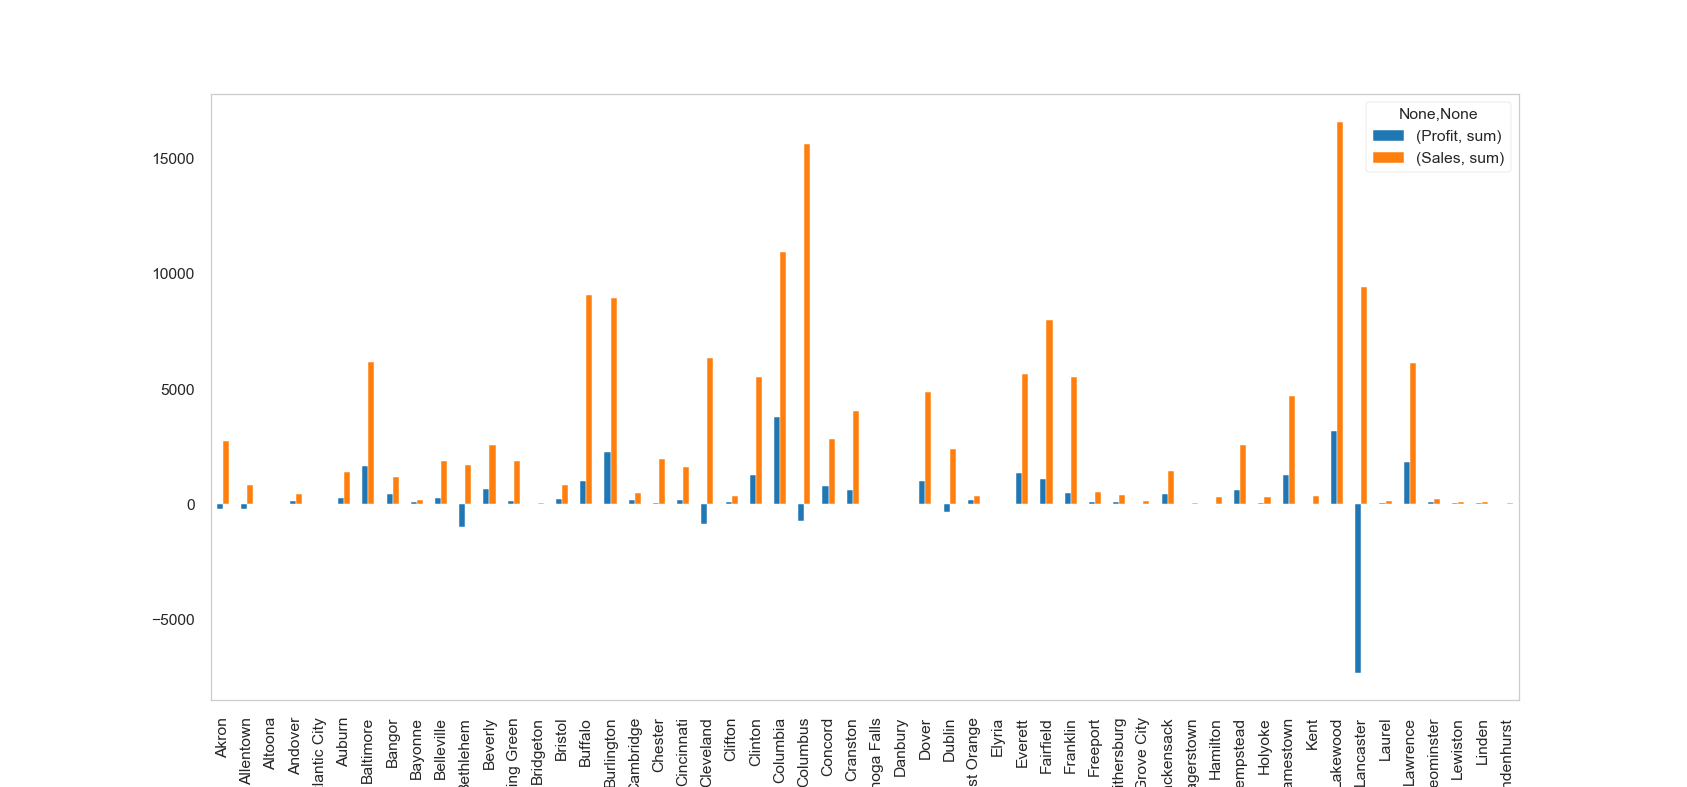

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<IPython.core.display.Javascript object>


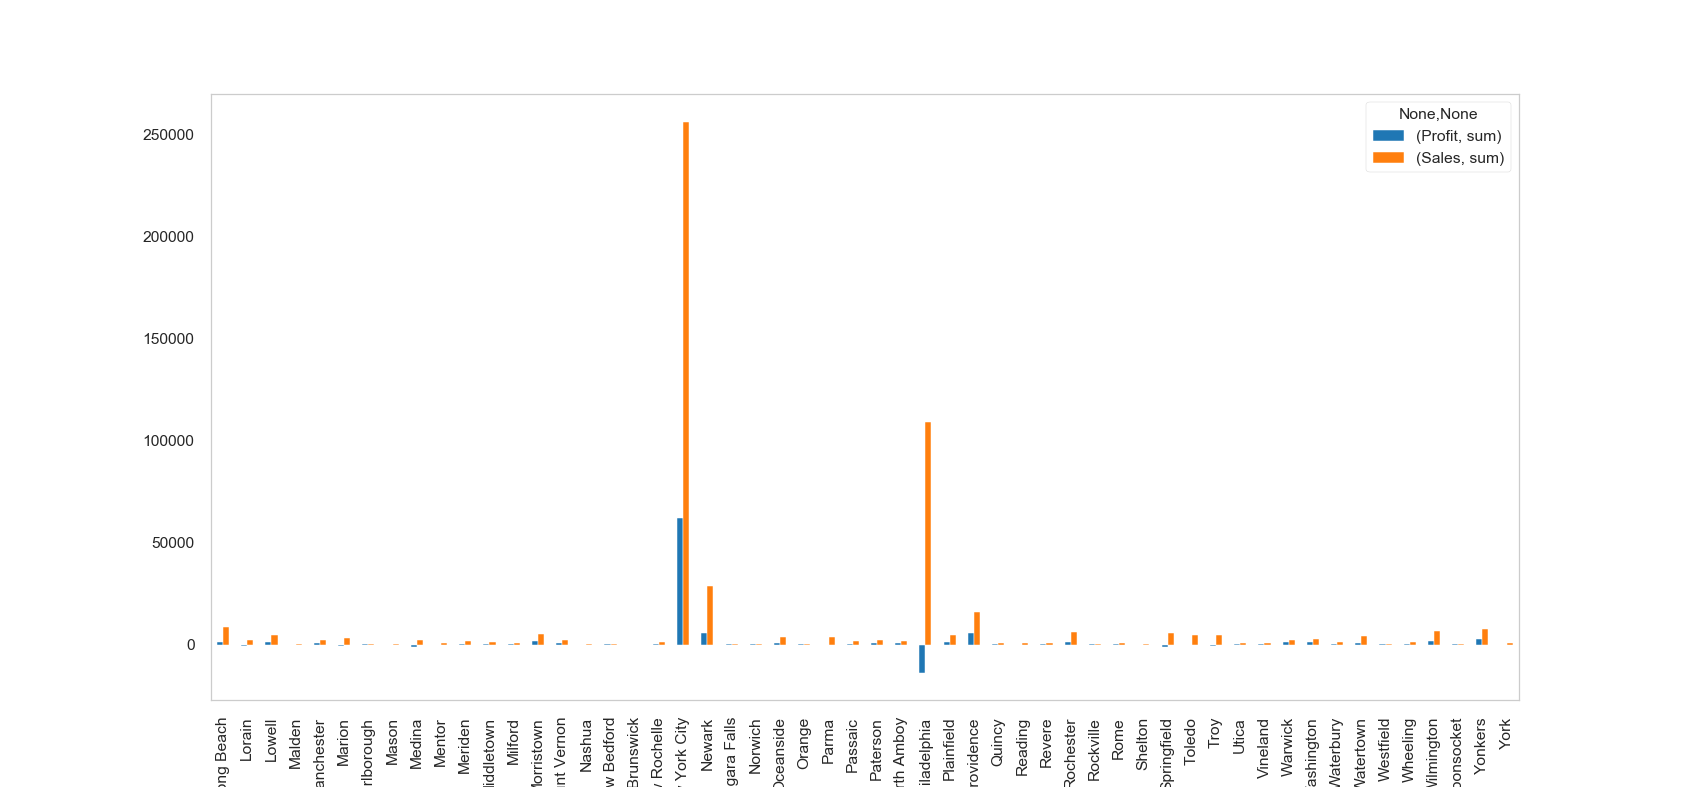

In [187]:
east.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).head(54).plot.bar(figsize=(15,7)).grid(b=False)
east.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).tail(54).plot.bar(figsize=(15,7)).grid(b=False)
#plt.grid(b=False)

### Cities like Lancaster, Philedelphia, Columbus, Bethlehem, cleveland , Dublin seems to not do well for the company among which Lancaster happens to be a huge loss
### Rest all the cities are doing well including New York and Columbia being the most successful ones

# West Region

In [198]:
west=df_Super.where(df_Super['Region']=='West')
west.dropna(inplace=True)
west[:3]

Ship Mode    Segment        Country         City       State  \
2    Second Class  Corporate  United States  Los Angeles  California   
5  Standard Class   Consumer  United States  Los Angeles  California   
6  Standard Class   Consumer  United States  Los Angeles  California   

   Postal Code Region         Category Sub-Category  Sales  Quantity  \
2      90036.0   West  Office Supplies       Labels  14.62       2.0   
5      90032.0   West        Furniture  Furnishings  48.86       7.0   
6      90032.0   West  Office Supplies          Art   7.28       4.0   

   Discount   Profit  
2       0.0   6.8714  
5       0.0  14.1694  
6       0.0   1.9656

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


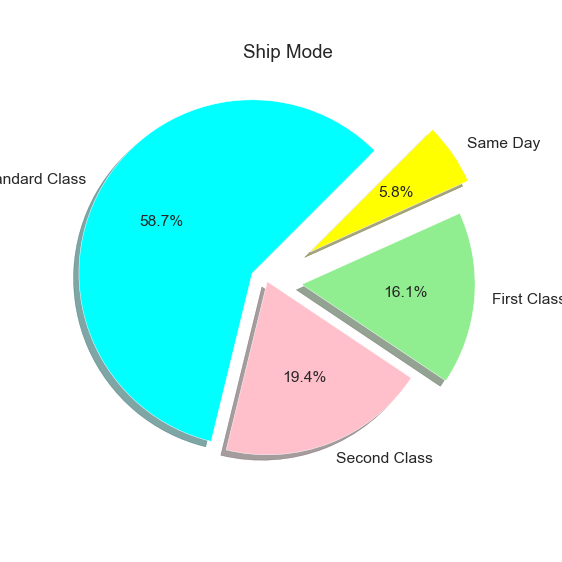

In [192]:
fig, ax = plt.subplots(figsize =(5, 5)) 
explode = (0.1, 0.0, 0.2, 0.3) 
colors=['cyan','pink','lightgreen','yellow']
plt.pie(west['Ship Mode'].value_counts(),colors=colors,
        labels= central['Ship Mode'].value_counts().index, startangle=45,
        autopct='%1.1f%%',shadow=True, explode=explode)
plt.title("Ship Mode");

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


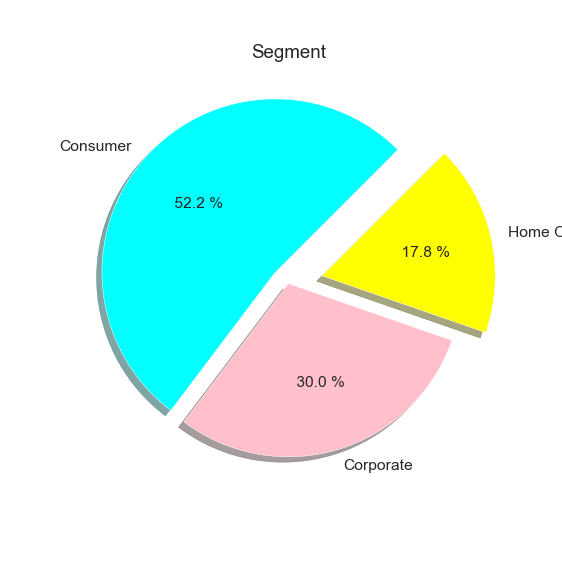

In [193]:
fig, ax = plt.subplots(figsize =(5, 5))
explode = (0.1, 0.0, 0.2)
colors=['cyan','pink','yellow']
plt.title("Segment")
plt.pie(west['Segment'].value_counts(), autopct ='% 1.1f %%',colors=colors,
        labels= central['Segment'].value_counts().index,
        startangle=45,shadow=True, explode=explode);

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


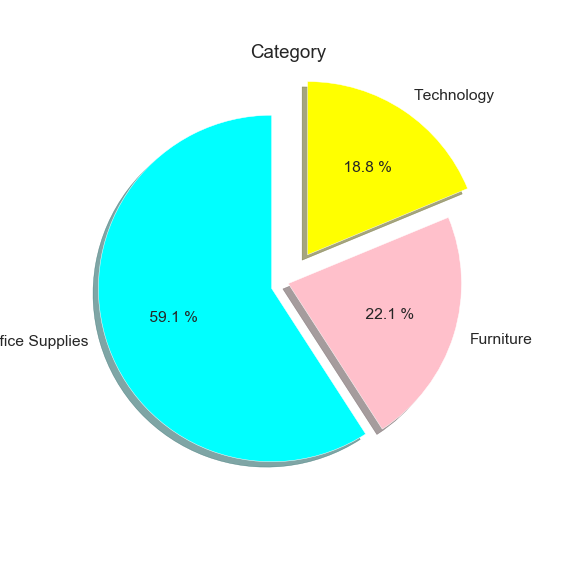

In [194]:
fig, ax = plt.subplots(figsize =(5, 5))
plt.title("Category")
explode = (0.1, 0.0, 0.2)
colors=['cyan','pink','yellow']
plt.pie(west['Category'].value_counts(),labels= central['Category'].value_counts().index, 
        startangle=90, colors= colors, explode=explode, autopct ='% 1.1f %%',shadow=True);

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


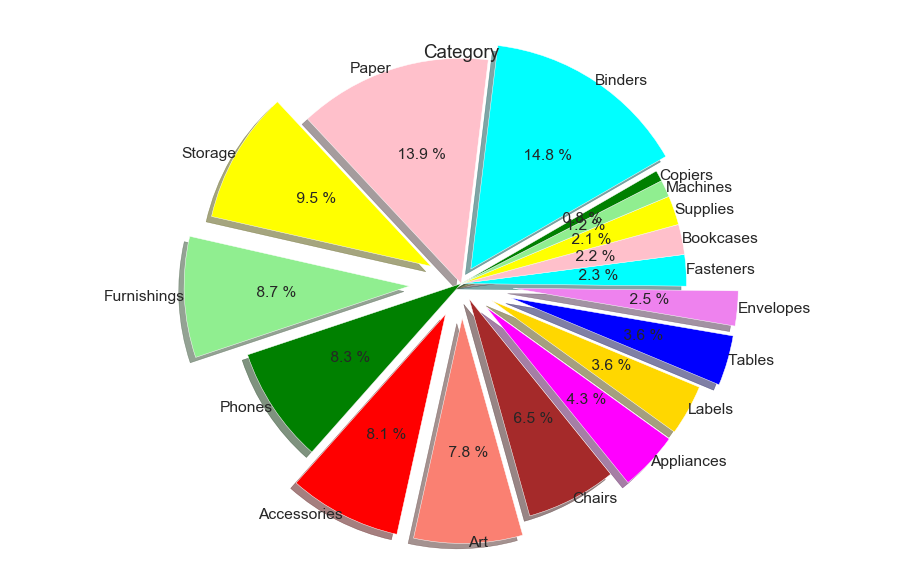

In [195]:
fig, ax = plt.subplots(figsize =(8, 5))
plt.title("Category")
explode = (0.1, 0.0, 0.2,0.3,0,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0,0,0,0,0)
colors=['cyan','pink','yellow','lightgreen', 'green', 'red','salmon','brown','magenta','gold','blue','violet']
plt.pie(west['Sub-Category'].value_counts(),
        labels= central['Sub-Category'].value_counts().index, 
        startangle=30, colors= colors,
        explode=explode, autopct ='% 1.1f %%',
       radius=1.3, labeldistance=1, shadow=True);

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


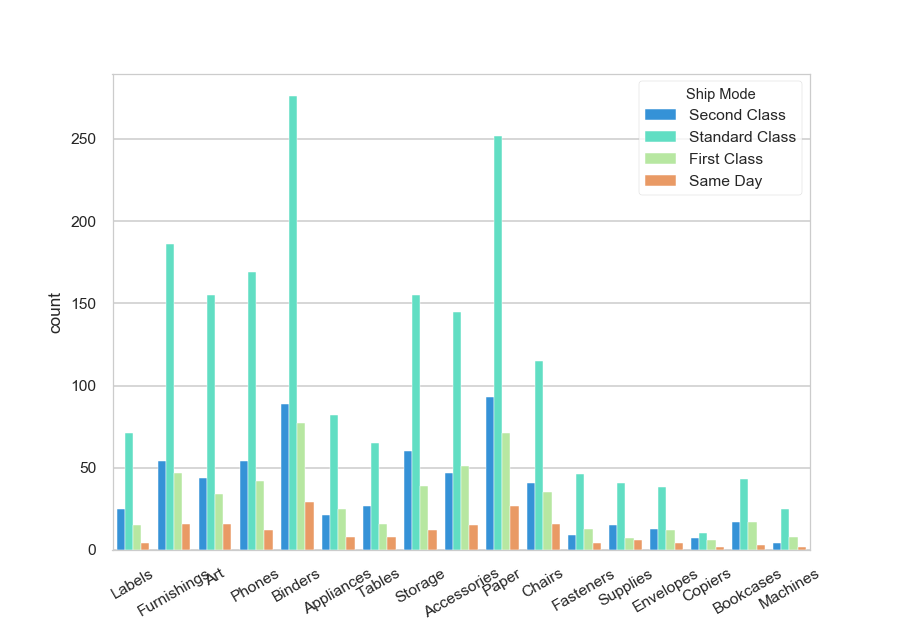

In [219]:
plt.figure()
sns.countplot(x=west['Sub-Category'],hue=west['Ship Mode'],palette='rainbow')
plt.xticks(rotation=30);

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<IPython.core.display.Javascript object>


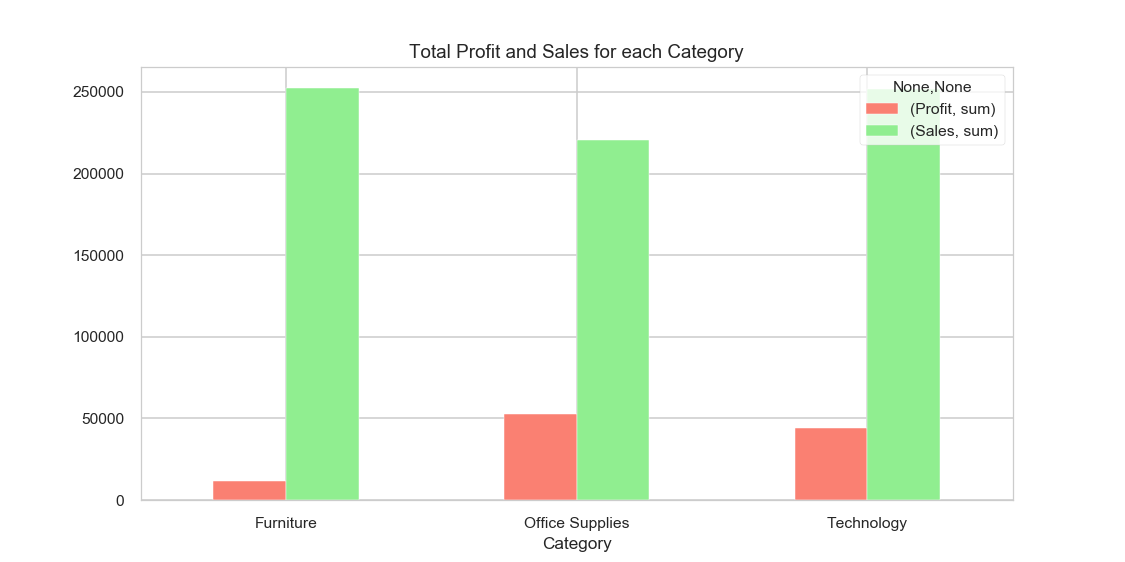

In [200]:
west.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,5),color=['salmon','lightgreen'])
plt.title('Total Profit and Sales for each Category')
plt.xticks(rotation=0)
plt.show()

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


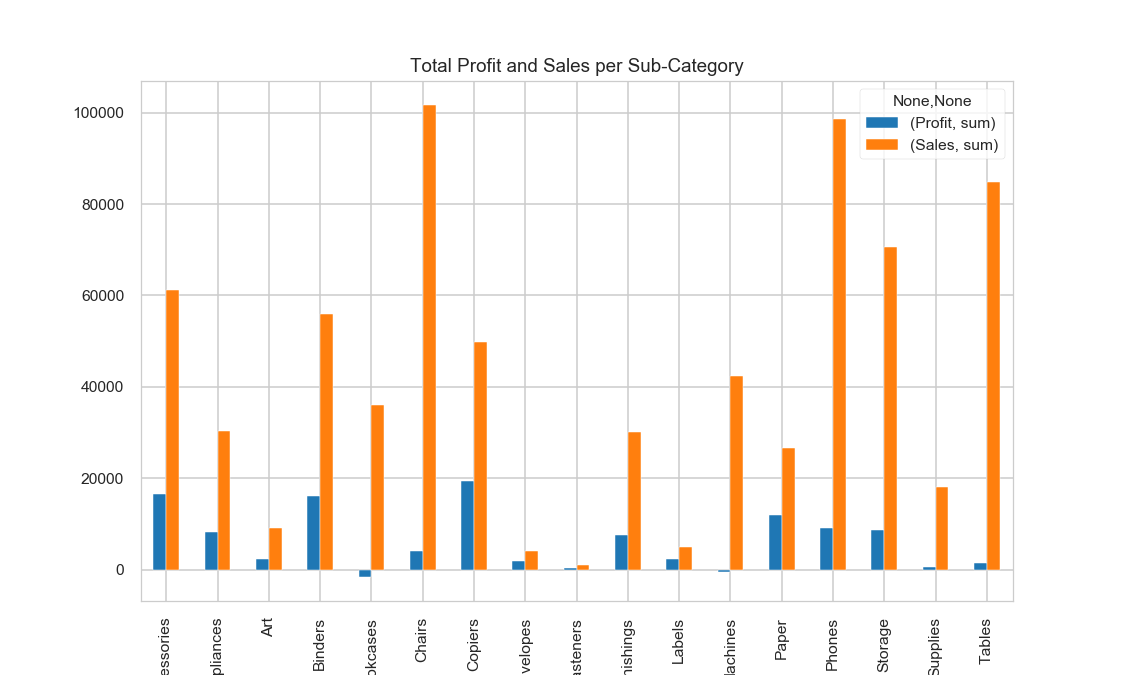

In [201]:
west.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


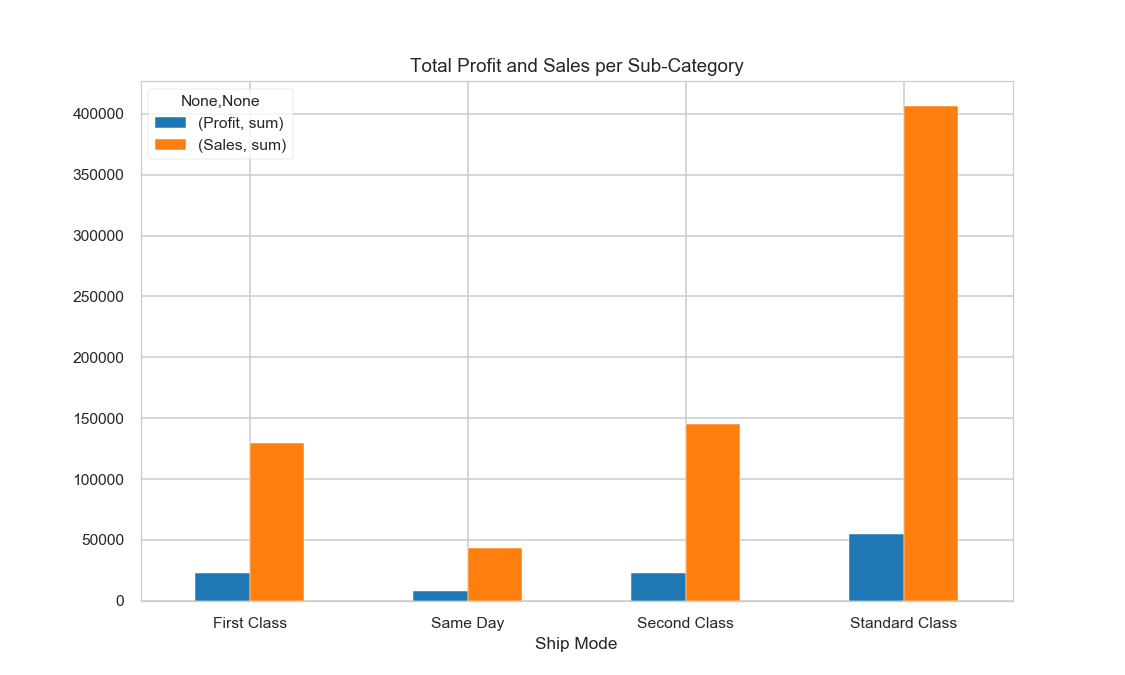

In [202]:
west.groupby('Ship Mode')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.xticks(rotation=0)
plt.show()

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


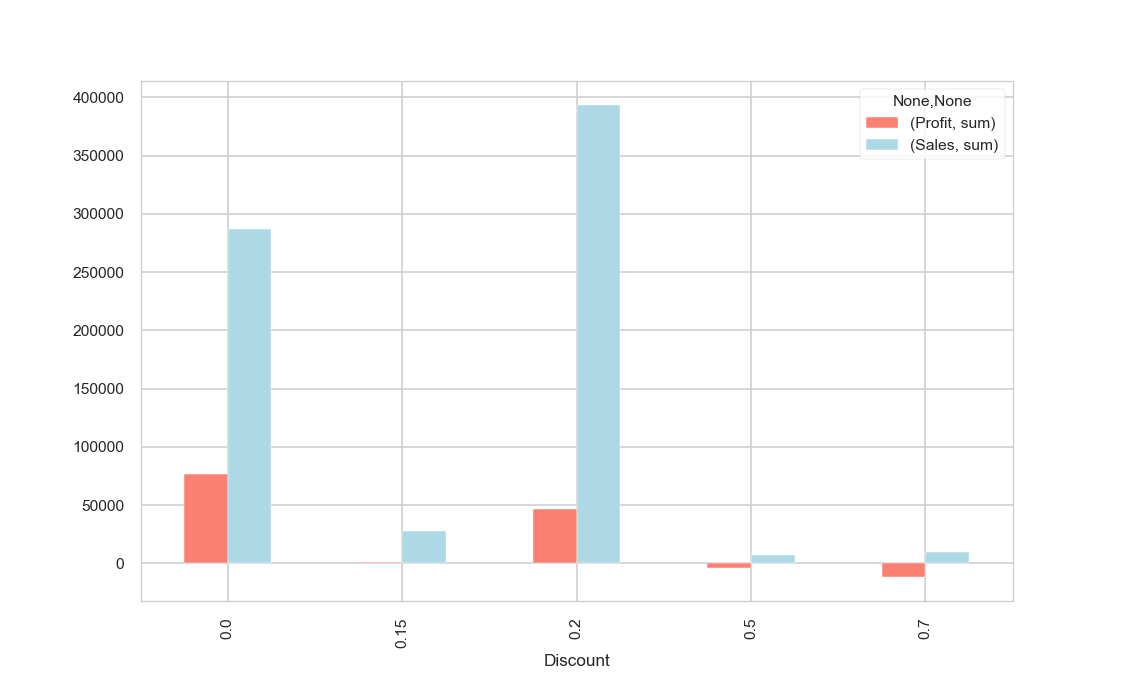

In [203]:
west.groupby('Discount')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6),color=['salmon','lightblue'])
plt.show()

### Like Previous Observations here too discounts results in loss

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


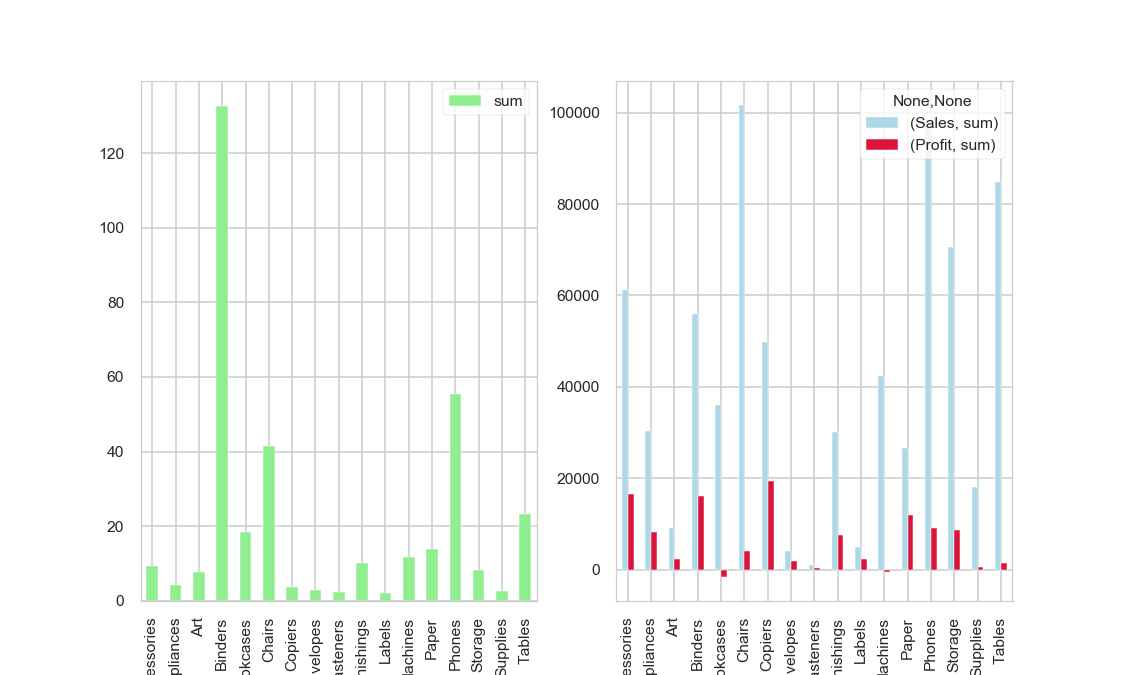

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [204]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

west.groupby('Sub-Category')['Discount'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightgreen'],ax=axes[0])
west.groupby('Sub-Category')['Sales','Profit'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightblue','crimson'],ax=axes[1])

In [206]:
west['City'].nunique()

169

In [207]:
west['City'].unique()


array(['Los Angeles', 'Seattle', 'West Jordan', 'San Francisco', 'Orem',
       'Gilbert', 'Portland', 'Aurora', 'Phoenix', 'Roseville',
       'Pasadena', 'Scottsdale', 'San Jose', 'Carlsbad', 'Redlands',
       'Denver', 'Whittier', 'Santa Clara', 'San Diego', 'Brentwood',
       'Inglewood', 'Colorado Springs', 'Arvada', 'Long Beach',
       'Hesperia', 'Layton', 'Tucson', 'Des Moines', 'Las Vegas',
       'Huntington Beach', 'Louisville', 'Concord', 'Costa Mesa',
       'Parker', 'Great Falls', 'Mesa', 'Anaheim', 'Marysville', 'Salem',
       'Vallejo', 'Mission Viejo', 'Sierra Vista', 'Vancouver',
       'Lancaster', 'Lake Elsinore', 'Edmonds', 'Santa Ana', 'Salinas',
       'Farmington', 'Riverside', 'Torrance', 'Oceanside', 'Murrieta',
       'Olympia', 'Oakland', 'Encinitas', 'Antioch', 'Reno', 'Escondido',
       'Fresno', 'Pueblo', 'Fairfield', 'Pico Rivera', 'Provo',
       'Pleasant Grove', 'Glendale', 'Westminster', 'Pomona',
       'North Las Vegas', 'Tempe', 'Laguna Nigu

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


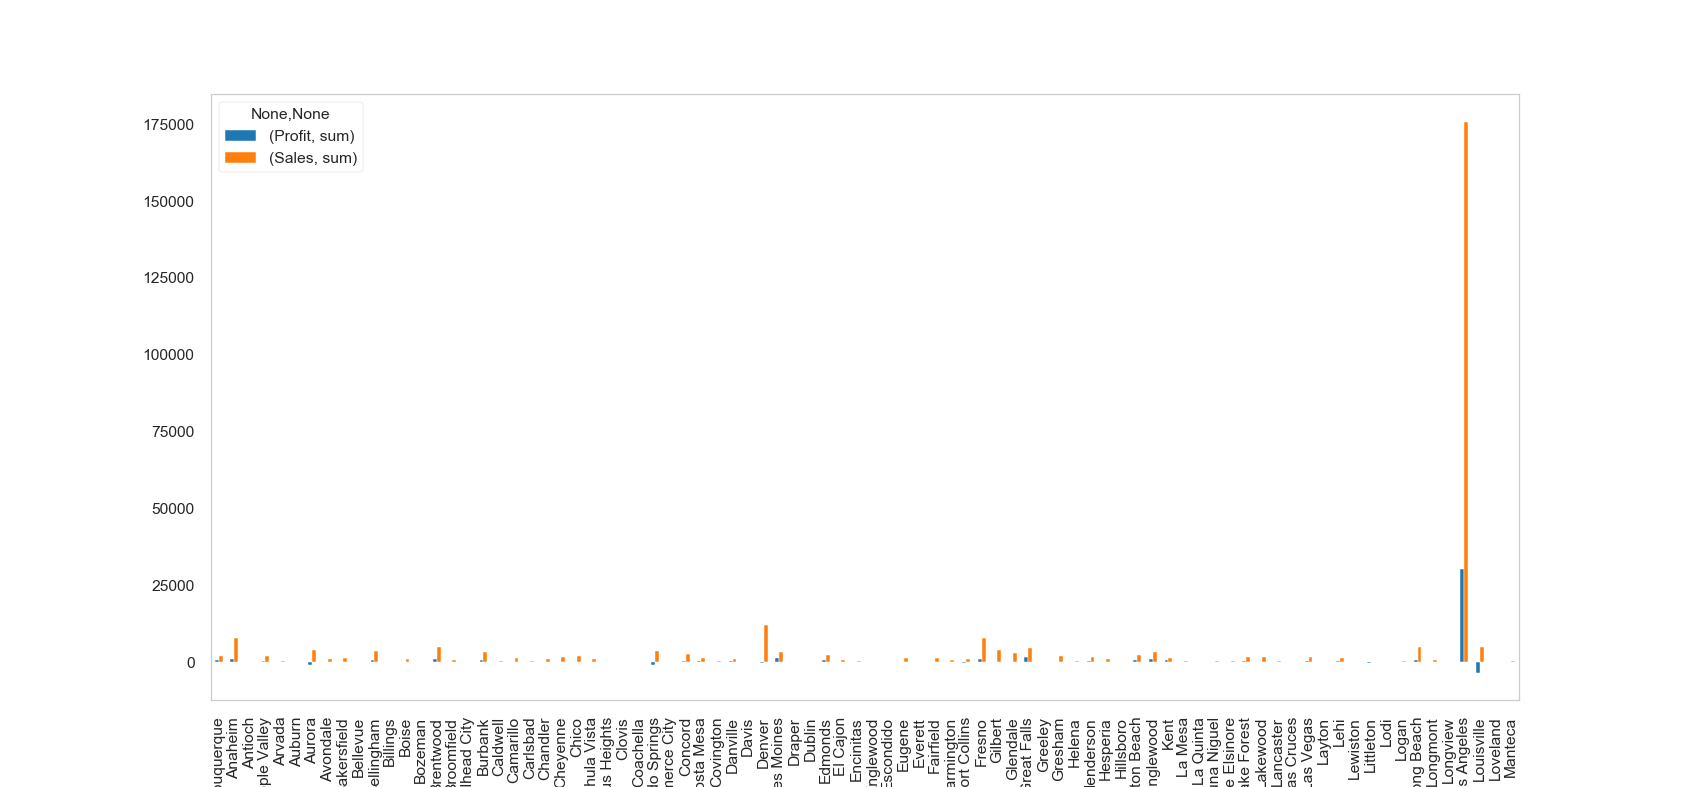

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<IPython.core.display.Javascript object>


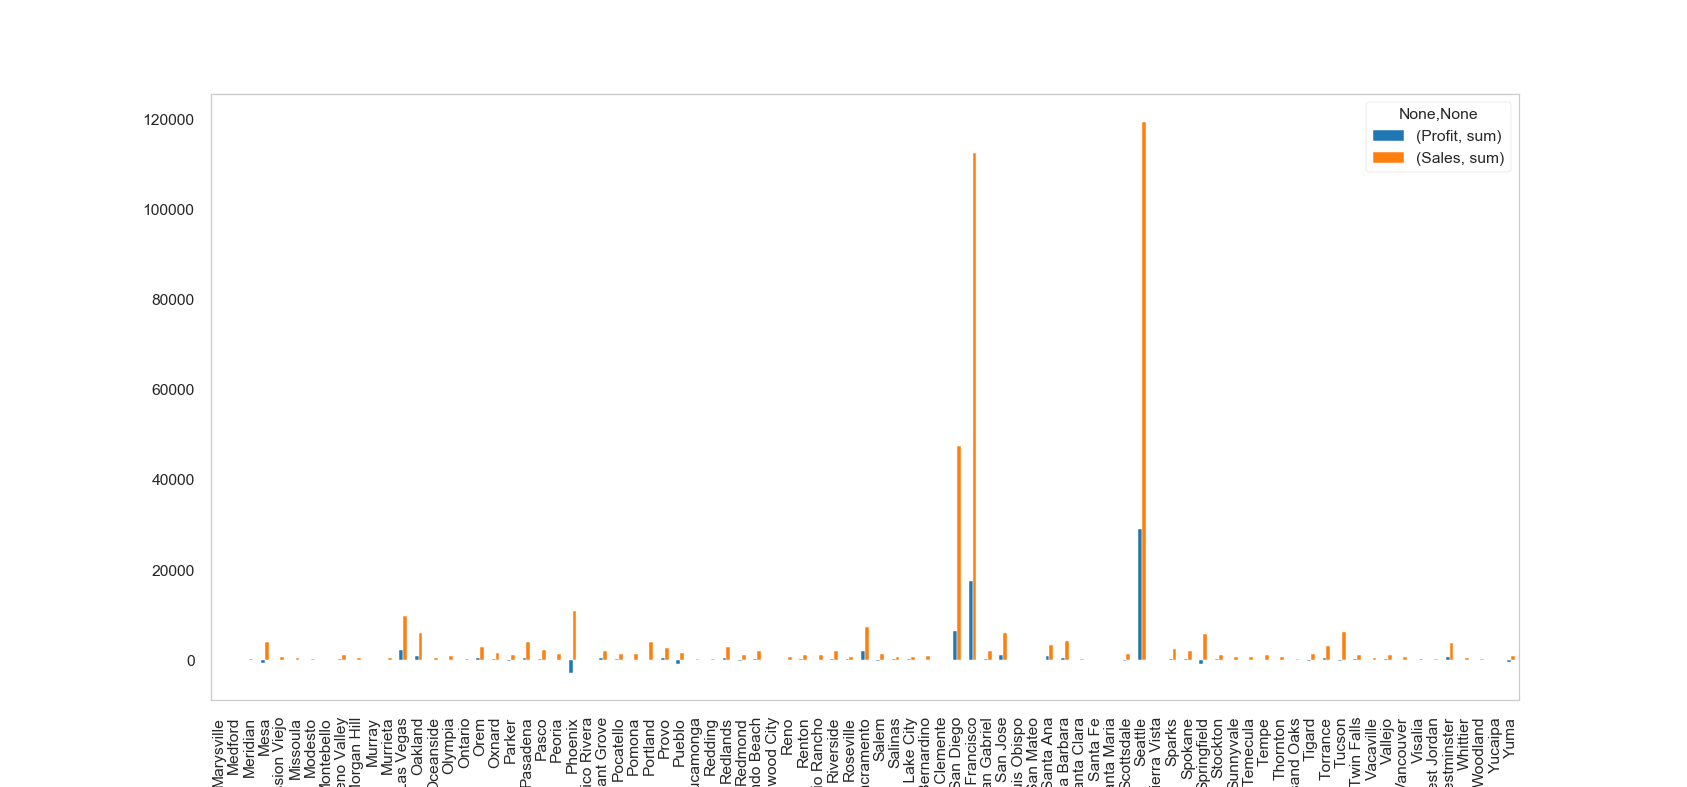

In [209]:
west.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).head(84).plot.bar(figsize=(15,7)).grid(b=False)
west.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).tail(85).plot.bar(figsize=(15,7)).grid(b=False)
#plt.grid(b=False)

### Almost all the Cities are doing well except Phoenix and Peublo which produces very minute loss
### While San Diego, San Francisco, Seattle and Los Angeles are a big success

# South Region

In [211]:
south=df_Super.where(df_Super['Region']=='South')
south.dropna(inplace=True)
south[:3]

Ship Mode   Segment        Country             City     State  \
0    Second Class  Consumer  United States        Henderson  Kentucky   
1    Second Class  Consumer  United States        Henderson  Kentucky   
3  Standard Class  Consumer  United States  Fort Lauderdale   Florida   

   Postal Code Region   Category Sub-Category     Sales  Quantity  Discount  \
0      42420.0  South  Furniture    Bookcases  261.9600       2.0      0.00   
1      42420.0  South  Furniture       Chairs  731.9400       3.0      0.00   
3      33311.0  South  Furniture       Tables  957.5775       5.0      0.45   

     Profit  
0   41.9136  
1  219.5820  
3 -383.0310

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


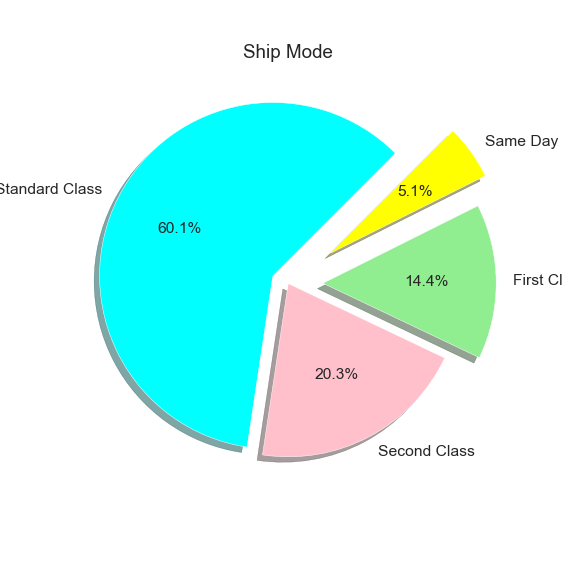

In [212]:
fig, ax = plt.subplots(figsize =(5, 5)) 
explode = (0.1, 0.0, 0.2, 0.3) 
colors=['cyan','pink','lightgreen','yellow']
plt.pie(south['Ship Mode'].value_counts(),colors=colors,
        labels= central['Ship Mode'].value_counts().index, startangle=45,
        autopct='%1.1f%%',shadow=True, explode=explode)
plt.title("Ship Mode");

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


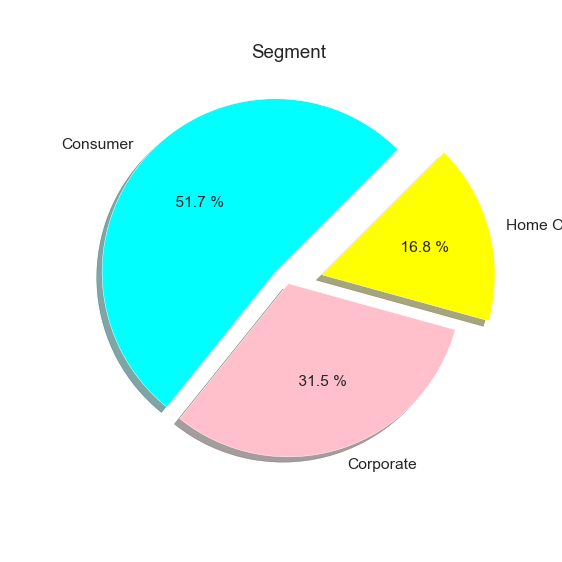

In [213]:
fig, ax = plt.subplots(figsize =(5, 5))
explode = (0.1, 0.0, 0.2)
colors=['cyan','pink','yellow']
plt.title("Segment")
plt.pie(south['Segment'].value_counts(), autopct ='% 1.1f %%',colors=colors,
        labels= central['Segment'].value_counts().index,
        startangle=45,shadow=True, explode=explode);

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


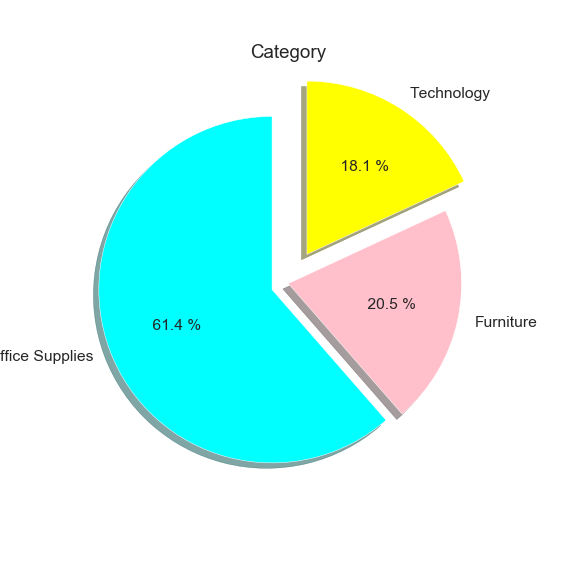

In [214]:
fig, ax = plt.subplots(figsize =(5, 5))
plt.title("Category")
explode = (0.1, 0.0, 0.2)
colors=['cyan','pink','yellow']
plt.pie(south['Category'].value_counts(),labels= central['Category'].value_counts().index, 
        startangle=90, colors= colors, explode=explode, autopct ='% 1.1f %%',shadow=True);

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


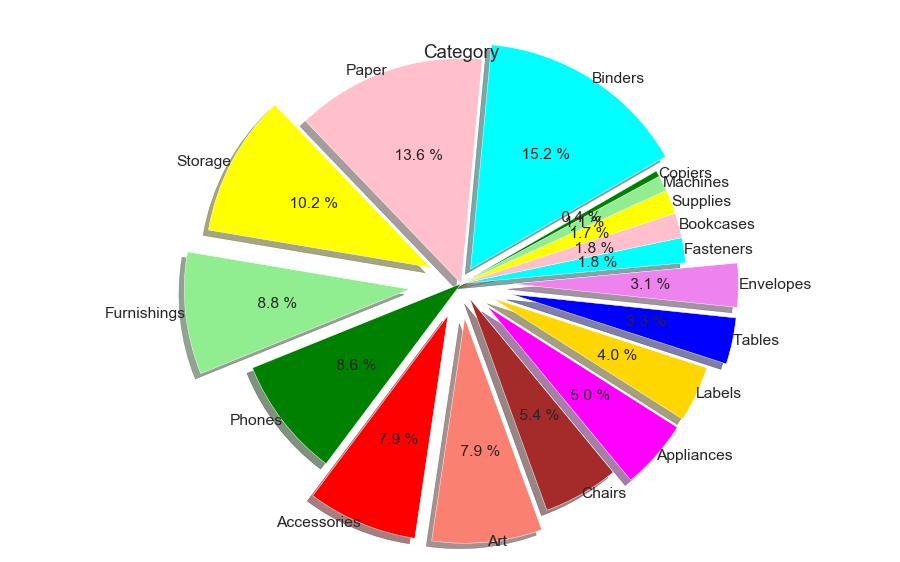

In [215]:
fig, ax = plt.subplots(figsize =(8, 5))
plt.title("Category")
explode = (0.1, 0.0, 0.2,0.3,0,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0,0,0,0,0)
colors=['cyan','pink','yellow','lightgreen', 'green', 'red','salmon','brown','magenta','gold','blue','violet']
plt.pie(south['Sub-Category'].value_counts(),
        labels= central['Sub-Category'].value_counts().index, 
        startangle=30, colors= colors,
        explode=explode, autopct ='% 1.1f %%',
       radius=1.3, labeldistance=1, shadow=True);

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


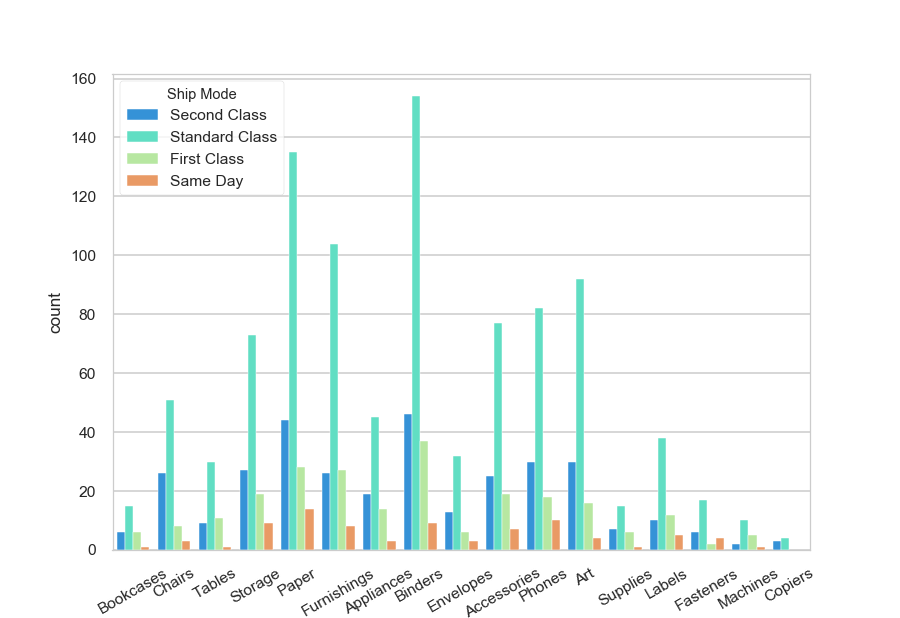

In [218]:
plt.figure()
sns.countplot(x=south['Sub-Category'],hue=south['Ship Mode'],palette='rainbow')
plt.xticks(rotation=30);

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<IPython.core.display.Javascript object>


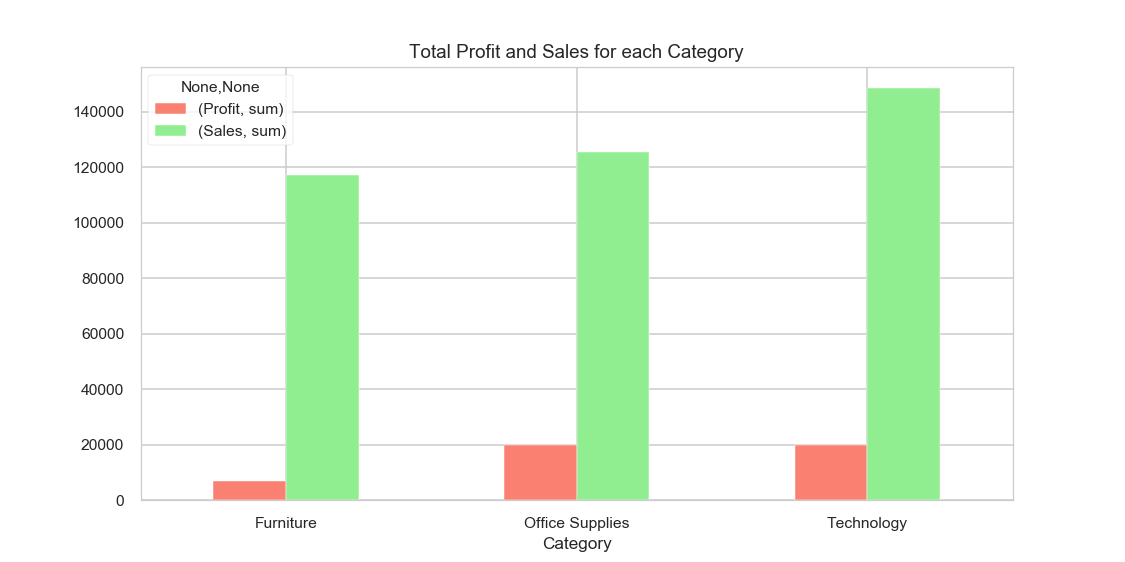

In [217]:
south.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,5),color=['salmon','lightgreen'])
plt.title('Total Profit and Sales for each Category')
plt.xticks(rotation=0)
plt.show()

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


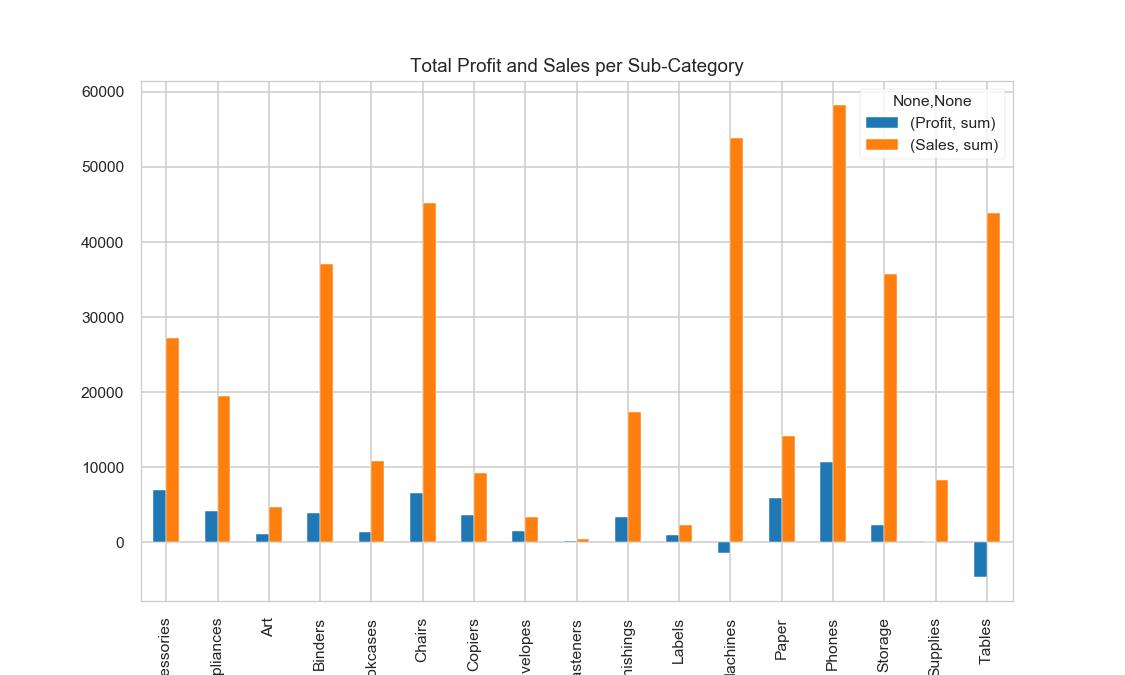

In [220]:
south.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


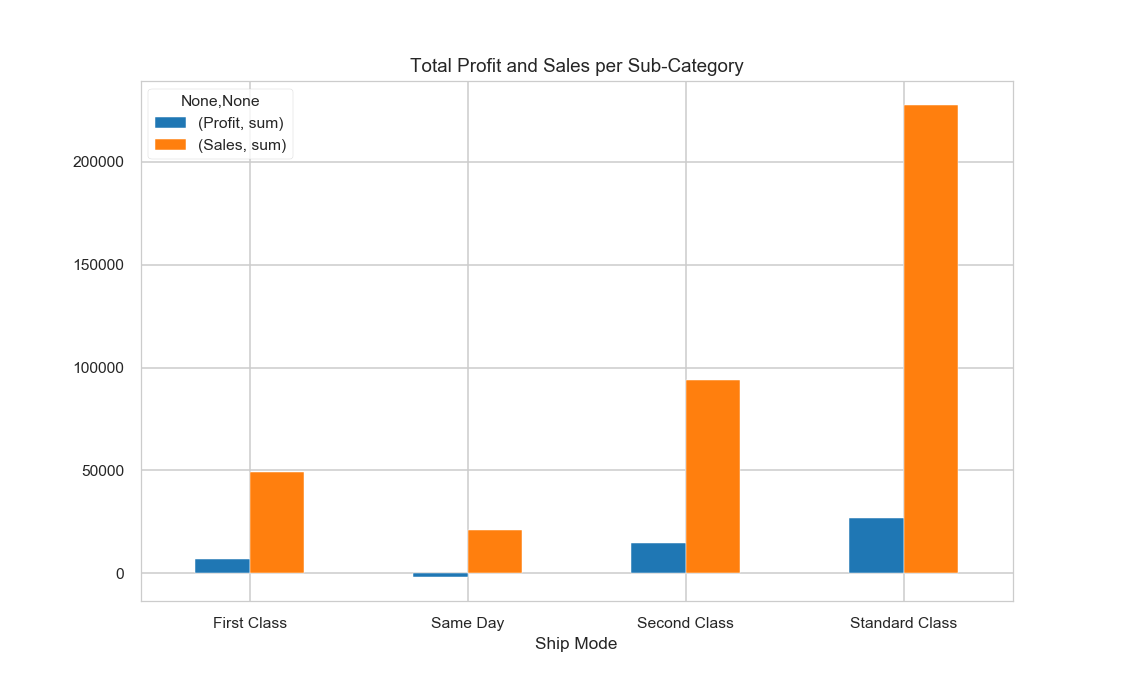

In [221]:
south.groupby('Ship Mode')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.xticks(rotation=0)
plt.show()

### Unlike of all the Regions here Same Day type shipping Mode is not really going well for the company where as standard class seems to do well

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


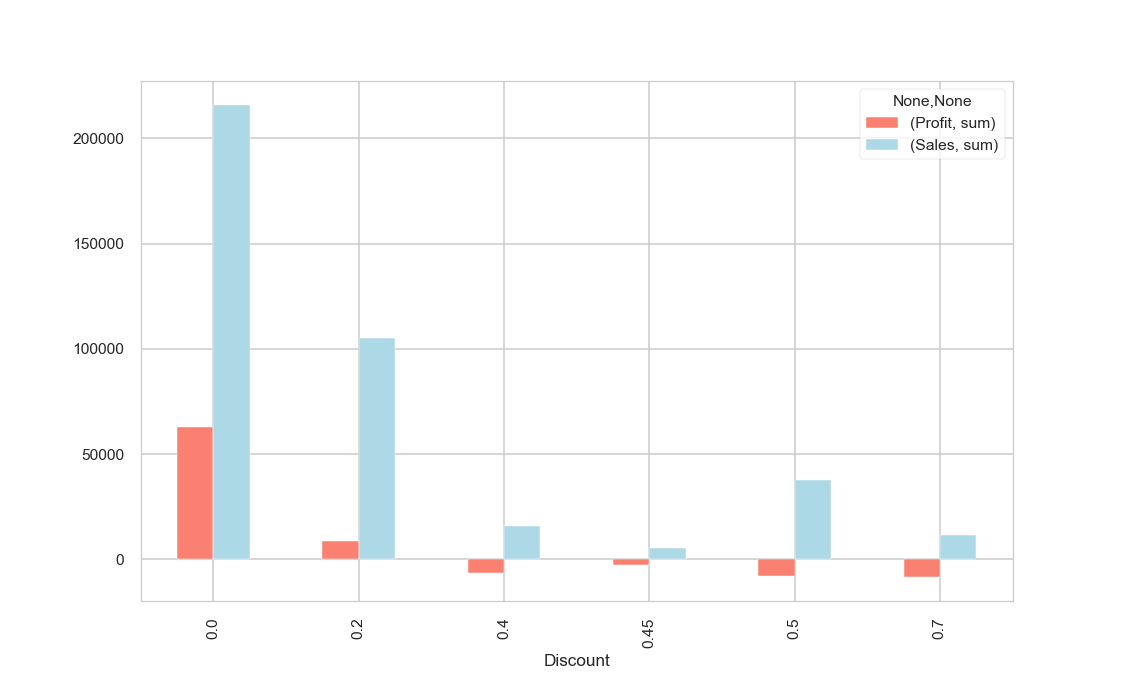

In [222]:
south.groupby('Discount')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6),color=['salmon','lightblue'])
plt.show()

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


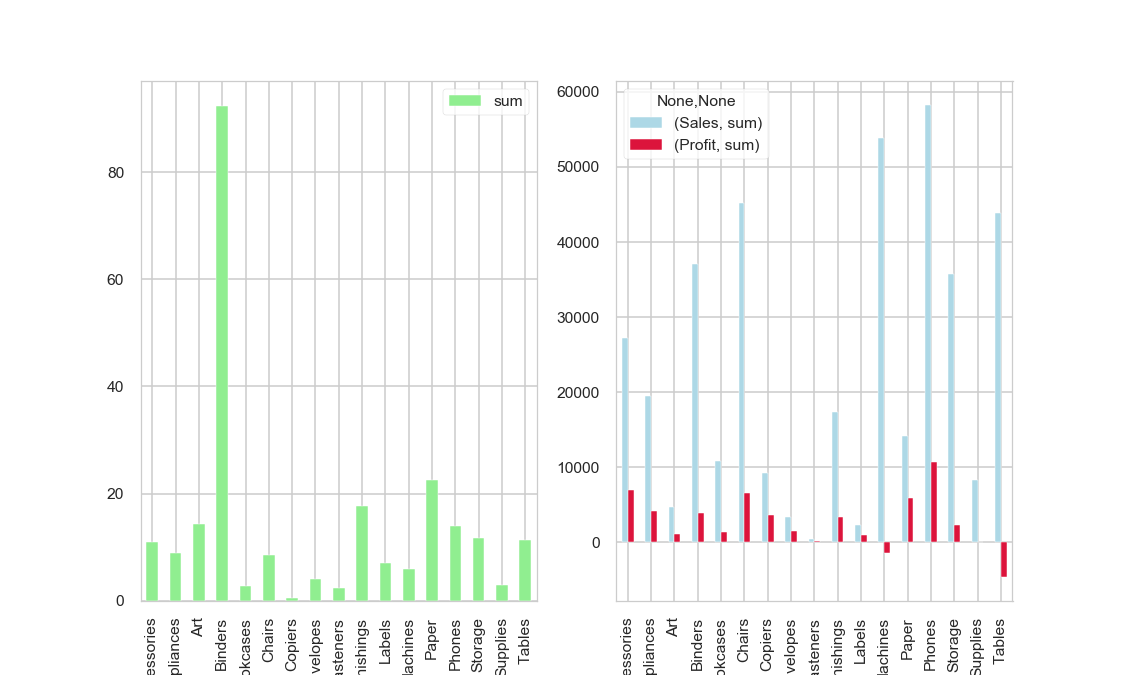

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [223]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

south.groupby('Sub-Category')['Discount'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightgreen'],ax=axes[0])
south.groupby('Sub-Category')['Sales','Profit'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightblue','crimson'],ax=axes[1])

### Machines and Table despite being on discount cant do well where as Phones , Chairs and Paper are doing well for the company despite small discounts

In [225]:
south['City'].nunique()

125

In [226]:
south['City'].unique()


array(['Henderson', 'Fort Lauderdale', 'Concord', 'Melbourne',
       'Springfield', 'Memphis', 'Decatur', 'Durham', 'Columbia',
       'Charlotte', 'Bristol', 'Monroe', 'Franklin', 'Tampa',
       'Chapel Hill', 'Tamarac', 'Arlington', 'Saint Petersburg',
       'Murfreesboro', 'Columbus', 'Pembroke Pines', 'Miami',
       'Wilmington', 'Richmond', 'Jackson', 'Gastonia', 'Jacksonville',
       'Fayetteville', 'Atlanta', 'Lakeland', 'Montgomery',
       'Warner Robins', 'Louisville', 'Burlington', 'Waynesboro', 'Cary',
       'Palm Coast', 'Hialeah', 'Bossier City', 'Asheville', 'Florence',
       'Alexandria', 'Boca Raton', 'Virginia Beach', 'Roswell',
       'Jonesboro', 'Homestead', 'Harrisonburg', 'Coral Springs',
       'Boynton Beach', 'Gulfport', 'Greenville', 'Macon', 'Deltona',
       'Murray', 'Smyrna', 'Salem', 'Mobile', 'Thomasville', 'Lafayette',
       'Suffolk', 'Greensboro', 'Raleigh', 'Bowling Green', 'Port Orange',
       'Charlottesville', 'Apopka', 'Chesapeake', 'Jo

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


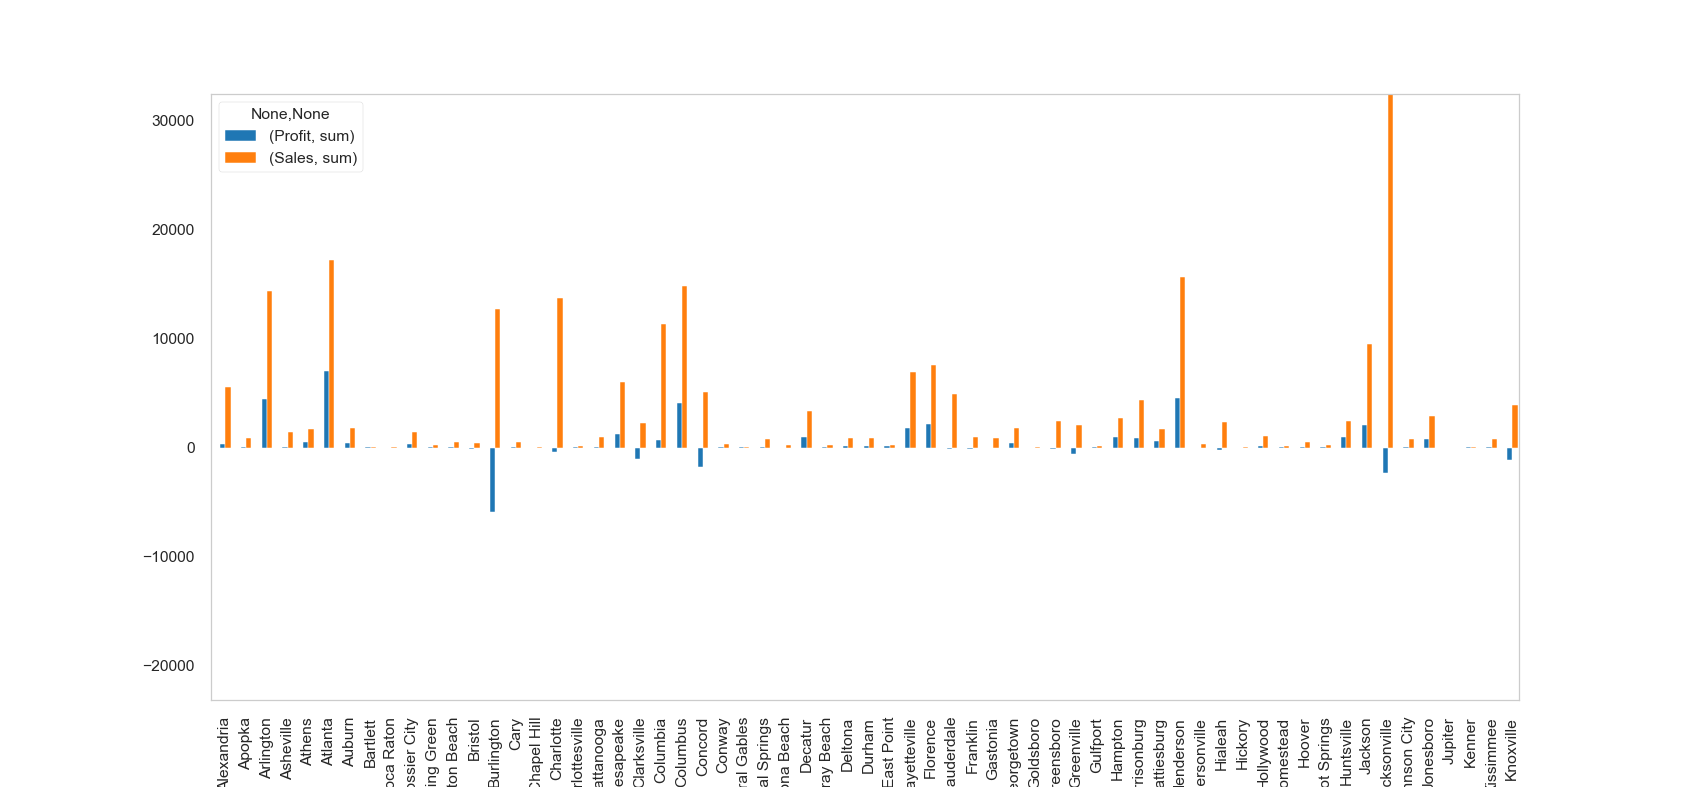

C:\Users\Sumana .LAPTOP-0PJ3SPIV\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<IPython.core.display.Javascript object>


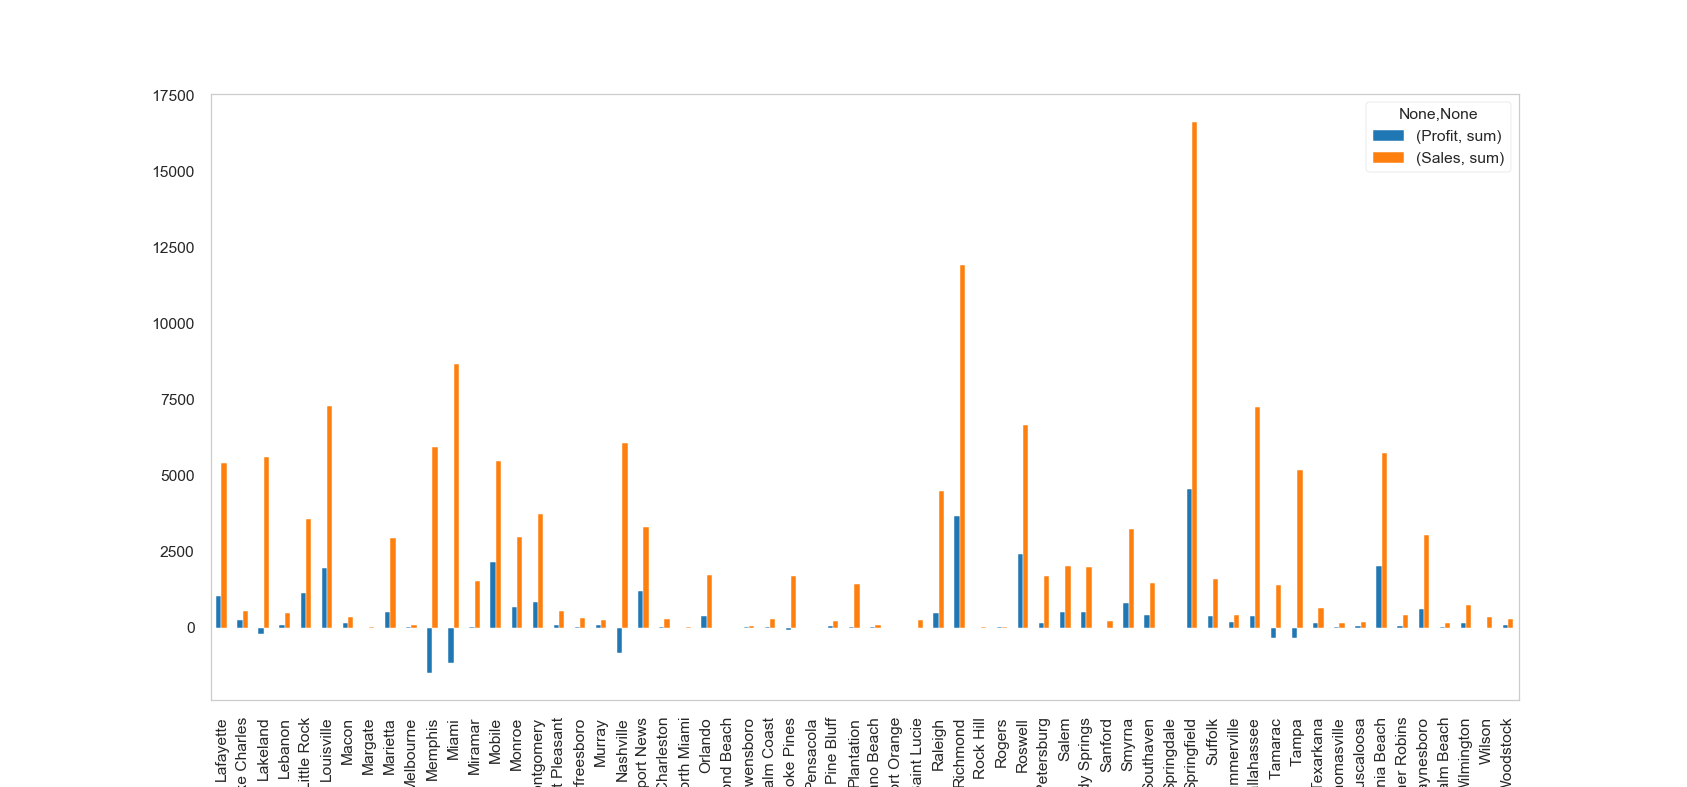

In [227]:
south.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).head(63).plot.bar(figsize=(15,7)).grid(b=False)
south.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).tail(62).plot.bar(figsize=(15,7)).grid(b=False)
#plt.grid(b=False)

### Cities Like Miami, Memphis, Nashville,Tamarac, Tampa, knoxville,Greenville, Concord, Clarksville and Burlington needs attention whereas Richmond, SpringField, Rosewell are bringing Profit to the company

## Final Results to Conclude

### East and West Region are doing great in the business whereas Central Region needs attention
### Selling Tables and machine create a huge loss almost in all the regions where as Phones, Chairs and Binders give a huge Profit despite of small discounts
### The discount amount should be taken care of as huge discounts does not seem to do well for the company
### The Standard Shipping mode is best for the company profit whereas Same Day Mode needs a hike in price
### The Company should  stop selling the loss creating products and sell more demanded products with less profits with the less demanded products with high profit